<a href="https://colab.research.google.com/github/momna763/Target_Lock/blob/main/Target_Lock_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Colab cell 1: install essentials and mount Drive
!pip install -q pandas scikit-learn matplotlib joblib

from google.colab import drive
drive.mount('/content/drive')   # follow the auth steps

import os
import pandas as pd

# Path to your folder in Drive
FOLDER_PATH = "/content/drive/MyDrive/Amazon_products_sales_data"

# Collect all CSV file paths
csv_files = [os.path.join(FOLDER_PATH, f) for f in os.listdir(FOLDER_PATH) if f.endswith('.csv')]
print("Found", len(csv_files), "CSV files")

# Read and merge all CSVs
dfs = []
for file in csv_files:
    try:
        df_temp = pd.read_csv(file)
        df_temp['source_file'] = os.path.basename(file)  # keep track of origin category
        dfs.append(df_temp)
    except Exception as e:
        print("Error reading", file, ":", e)

df = pd.concat(dfs, ignore_index=True)
print("Final merged shape:", df.shape)

# Normalize columns
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 140 CSV files
Final merged shape: (1103170, 11)


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,source_file,unnamed:_0
0,Godrej aer Matic Kit (Machine + 1 Refill) - Au...,home & kitchen,All Home & Kitchen,https://m.media-amazon.com/images/I/6121tV2hW9...,https://www.amazon.in/Godrej-Matic-Spray-Viole...,4.1,"16,946",₹466,₹569.01,All Home and Kitchen.csv,NaN
1,"Presto! Oxo-Biodegradable Garbage Bags, Large ...",home & kitchen,All Home & Kitchen,https://m.media-amazon.com/images/I/71-2fEBGZD...,https://www.amazon.in/Amazon-Brand-Presto-Oxo-...,4.3,"26,857",₹349,₹480,All Home and Kitchen.csv,NaN
2,Happilo 100% Natural Premium 200g Whole Cashew...,home & kitchen,All Home & Kitchen,https://m.media-amazon.com/images/I/71tYPz++3+...,https://www.amazon.in/Happilo-100-Natural-Prem...,4.2,"13,919",₹199,₹335,All Home and Kitchen.csv,NaN
3,beatXP Kitchen Scale Multipurpose Portable Ele...,home & kitchen,All Home & Kitchen,https://m.media-amazon.com/images/I/61Is7sICRJ...,https://www.amazon.in/beatXP-Multipurpose-Port...,3.7,"3,306",₹399,"₹1,999",All Home and Kitchen.csv,NaN
4,"Dettol Antiseptic Liquid for First Aid , Surfa...",home & kitchen,All Home & Kitchen,https://m.media-amazon.com/images/I/51fFgtFBsh...,https://www.amazon.in/Dettol-Antiseptic-Liquid...,4.6,"19,981",₹342,₹364,All Home and Kitchen.csv,NaN


In [ ]:
df.info()
df['source_file'].value_counts().head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   name            1103170 non-null  object 
 1   main_category   1103170 non-null  object 
 2   sub_category    1103170 non-null  object 
 3   image           1103170 non-null  object 
 4   link            1103170 non-null  object 
 5   ratings         751582 non-null   object 
 6   no_of_ratings   751582 non-null   object 
 7   discount_price  980844 non-null   object 
 8   actual_price    1067544 non-null  object 
 9   source_file     1103170 non-null  object 
 10  unnamed:_0      551585 non-null   float64
dtypes: float64(1), object(10)
memory usage: 92.6+ MB


,count
source_file,
Amazon-Products.csv,551585
Formal Shoes.csv,19200
Western Wear.csv,19200
Mens Fashion.csv,19200
Shirts.csv,19200


In [ ]:
import re

# Clean discount_price
def clean_price(x):
    if pd.isna(x):
        return None
    x = str(x)
    x = re.sub(r"[^\d.]", "", x)  # remove currency symbols, commas, spaces
    return float(x) if x else None

df['discount_price'] = df['discount_price'].apply(clean_price)
df['actual_price'] = df['actual_price'].apply(clean_price)

# Clean ratings (extract number like 4.3)
def clean_rating(x):
    if pd.isna(x):
        return None
    match = re.search(r"(\d+(\.\d+)?)", str(x))
    return float(match.group(1)) if match else None

df['ratings'] = df['ratings'].apply(clean_rating)

# Clean number of ratings (remove commas, convert to int)
def clean_num_ratings(x):
    if pd.isna(x):
        return 0
    x = str(x).replace(",", "")
    return int(x) if x.isdigit() else 0

df['no_of_ratings'] = df['no_of_ratings'].apply(clean_num_ratings)

df.head()


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,source_file,unnamed:_0
0,Godrej aer Matic Kit (Machine + 1 Refill) - Au...,home & kitchen,All Home & Kitchen,https://m.media-amazon.com/images/I/6121tV2hW9...,https://www.amazon.in/Godrej-Matic-Spray-Viole...,4.1,16946,466.0,569.01,All Home and Kitchen.csv,NaN
1,"Presto! Oxo-Biodegradable Garbage Bags, Large ...",home & kitchen,All Home & Kitchen,https://m.media-amazon.com/images/I/71-2fEBGZD...,https://www.amazon.in/Amazon-Brand-Presto-Oxo-...,4.3,26857,349.0,480.00,All Home and Kitchen.csv,NaN
2,Happilo 100% Natural Premium 200g Whole Cashew...,home & kitchen,All Home & Kitchen,https://m.media-amazon.com/images/I/71tYPz++3+...,https://www.amazon.in/Happilo-100-Natural-Prem...,4.2,13919,199.0,335.00,All Home and Kitchen.csv,NaN
3,beatXP Kitchen Scale Multipurpose Portable Ele...,home & kitchen,All Home & Kitchen,https://m.media-amazon.com/images/I/61Is7sICRJ...,https://www.amazon.in/beatXP-Multipurpose-Port...,3.7,3306,399.0,1999.00,All Home and Kitchen.csv,NaN
4,"Dettol Antiseptic Liquid for First Aid , Surfa...",home & kitchen,All Home & Kitchen,https://m.media-amazon.com/images/I/51fFgtFBsh...,https://www.amazon.in/Dettol-Antiseptic-Liquid...,4.6,19981,342.0,364.00,All Home and Kitchen.csv,NaN


In [ ]:
# Profit margin percentage
df['discount_percentage'] = (
    (df['actual_price'] - df['discount_price']) / df['actual_price'] * 100
).fillna(0)

# Simple profitability score = discount% * rating * log(no_of_ratings+1)
import numpy as np

df['profitability_score'] = (
    df['discount_percentage'] * (df['ratings'].fillna(0)) * np.log1p(df['no_of_ratings'])
)

# Normalize profitability score between 0–100
df['profitability_score'] = (
    (df['profitability_score'] - df['profitability_score'].min()) /
    (df['profitability_score'].max() - df['profitability_score'].min()) * 100
)

df['profitability_score'] = df['profitability_score'].fillna(0).round(2)

df[['name', 'discount_price', 'actual_price', 'ratings', 'no_of_ratings', 'profitability_score']].head()


,name,discount_price,actual_price,ratings,no_of_ratings,profitability_score
0,Godrej aer Matic Kit (Machine + 1 Refill) - Au...,466.0,569.01,4.1,16946,12.98
1,"Presto! Oxo-Biodegradable Garbage Bags, Large ...",349.0,480.00,4.3,26857,21.50
2,Happilo 100% Natural Premium 200g Whole Cashew...,199.0,335.00,4.2,13919,29.22
3,beatXP Kitchen Scale Multipurpose Portable Ele...,399.0,1999.00,3.7,3306,43.11
4,"Dettol Antiseptic Liquid for First Aid , Surfa...",342.0,364.00,4.6,19981,4.95


In [ ]:
df.isna().sum()


,0
name,0
main_category,0
sub_category,0
image,0
link,0
ratings,364006
no_of_ratings,0
discount_price,122326
actual_price,35626
source_file,0


In [ ]:
# 1. Drop useless index column
if 'unnamed:_0' in df.columns:
    df = df.drop(columns=['unnamed:_0'])

# 2. Fill missing ratings with 0 (means no rating yet)
df['ratings'] = df['ratings'].fillna(0)

# 3. Fill missing prices
df['actual_price'] = df['actual_price'].fillna(df['discount_price'])  # if MRP missing, use discount price
df['discount_price'] = df['discount_price'].fillna(df['actual_price'])  # vice versa

# 4. Recompute discount_percentage (after fixing missing prices)
df['discount_percentage'] = (
    (df['actual_price'] - df['discount_price']) / df['actual_price'] * 100
).replace([np.inf, -np.inf], 0).fillna(0)

# 5. Recompute profitability_score
df['profitability_score'] = (
    df['discount_percentage'] * df['ratings'] * np.log1p(df['no_of_ratings'])
)

# Normalize again between 0–100
df['profitability_score'] = (
    (df['profitability_score'] - df['profitability_score'].min()) /
    (df['profitability_score'].max() - df['profitability_score'].min()) * 100
).fillna(0).round(2)

# Final check
df.isna().sum()


,0
name,0
main_category,0
sub_category,0
image,0
link,0
ratings,0
no_of_ratings,0
discount_price,35626
actual_price,35626
source_file,0


In [ ]:
# Drop products with no price info
df = df.dropna(subset=['discount_price', 'actual_price'])

print("Final dataset shape:", df.shape)


Final dataset shape: (1067544, 12)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy dataset to avoid accidental overwrite
df_encoded = df.copy()

# Encode main_category
le_main = LabelEncoder()
df_encoded["main_category"] = le_main.fit_transform(df_encoded["main_category"])

# Encode sub_category
le_sub = LabelEncoder()
df_encoded["sub_category"] = le_sub.fit_transform(df_encoded["sub_category"])


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_features = ["ratings", "no_of_ratings", "discount_price", "actual_price", "discount_percentage"]
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])


In [ ]:
import os, joblib, json

# where to save
MODELS_DIR = "/content/drive/MyDrive/target_lock_models"
os.makedirs(MODELS_DIR, exist_ok=True)

# save sklearn objects
joblib.dump(le_main, os.path.join(MODELS_DIR, "labelencoder_main.joblib"), compress=3)
joblib.dump(le_sub, os.path.join(MODELS_DIR, "labelencoder_sub.joblib"), compress=3)
joblib.dump(scaler, os.path.join(MODELS_DIR, "scaler_numeric.joblib"), compress=3)

# also save mappings (helpful for backend/frontend)
le_main_map = {int(i): label for i, label in enumerate(le_main.classes_)}
le_sub_map = {int(i): label for i, label in enumerate(le_sub.classes_)}

with open(os.path.join(MODELS_DIR, "label_map_main.json"), "w", encoding="utf-8") as f:
    json.dump(le_main_map, f, ensure_ascii=False, indent=2)

with open(os.path.join(MODELS_DIR, "label_map_sub.json"), "w", encoding="utf-8") as f:
    json.dump(le_sub_map, f, ensure_ascii=False, indent=2)

print("Saved encoders and scaler to:", MODELS_DIR)
print("Unique main_category:", len(le_main.classes_), "  Unique sub_category:", len(le_sub.classes_))


Saved encoders and scaler to: /content/drive/MyDrive/target_lock_models
Unique main_category: 20   Unique sub_category: 112


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# features and target
feature_cols = ["main_category", "sub_category", "ratings", "no_of_ratings",
                "discount_price", "actual_price", "discount_percentage"]
target_col = "profitability_score"

# ensure they exist
missing = [c for c in feature_cols + [target_col] if c not in df_encoded.columns]
if missing:
    raise ValueError("Missing columns: " + ", ".join(missing))

X = df_encoded[feature_cols].values
y = df_encoded[target_col].values

print("Full X shape:", X.shape, " Full y shape:", y.shape)

# sample for quicker experiments
sample_size = min(200_000, len(df_encoded))
print("Sampling", sample_size, "rows for training (you can change this)")

rng = np.random.RandomState(42)
idx = rng.choice(len(X), size=sample_size, replace=False)
X_sample = X[idx]
y_sample = y[idx]

# Train / val / test split: 70% train, 15% val, 15% test (of the sample)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_sample, y_sample, test_size=0.15, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.17647, random_state=42
)  # 0.17647 * 0.85 ≈ 0.15 -> makes train:val:test ≈ 0.7:0.15:0.15

print("Shapes -> train:", X_train.shape, "val:", X_val.shape, "test:", X_test.shape)


Full X shape: (1067544, 7)  Full y shape: (1067544,)
Sampling 200000 rows for training (you can change this)
Shapes -> train: (140000, 7) val: (30000, 7) test: (30000, 7)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# baseline model
rf = RandomForestRegressor(
    n_estimators=100,     # number of trees
    max_depth=None,       # trees grow fully
    n_jobs=-1,            # use all CPU cores
    random_state=42
)

print("Training RandomForestRegressor...")
rf.fit(X_train, y_train)

# evaluate
def evaluate(model, X, y, split_name):
    preds = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, preds))
    r2 = r2_score(y, preds)
    print(f"{split_name} -> RMSE: {rmse:.4f}, R²: {r2:.4f}")
    return rmse, r2

evaluate(rf, X_train, y_train, "Train")
evaluate(rf, X_val, y_val, "Validation")
evaluate(rf, X_test, y_test, "Test")


Training RandomForestRegressor...
Train -> RMSE: 0.0772, R²: 0.9999
Validation -> RMSE: 0.1851, R²: 0.9996
Test -> RMSE: 0.1803, R²: 0.9997


(np.float64(0.18033109499011352), 0.9996664561205428)

In [ ]:
# Define feature names manually (based on your dataset)
feature_names = [
    "main_category",
    "sub_category",
    "ratings",
    "no_of_ratings",
    "discount_price",
    "actual_price",
    "discount_percentage"
]


In [ ]:
import pandas as pd

importances = rf.feature_importances_

fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(fi_df)


               Feature  Importance
3        no_of_ratings    0.670351
6  discount_percentage    0.308826
2              ratings    0.020443
5         actual_price    0.000119
4       discount_price    0.000101
1         sub_category    0.000092
0        main_category    0.000068


In [ ]:
# Predict on test set
y_pred = rf.predict(X_test)

# Compare first few predictions vs actual
for i in range(10):
    print(f"Actual: {y_test[i]:.3f} | Predicted: {y_pred[i]:.3f}")


Actual: 18.380 | Predicted: 18.413
Actual: 0.000 | Predicted: 0.000
Actual: 8.390 | Predicted: 8.315
Actual: 7.170 | Predicted: 7.175
Actual: 23.100 | Predicted: 23.070
Actual: 2.500 | Predicted: 2.500
Actual: 0.000 | Predicted: 0.000
Actual: 26.120 | Predicted: 26.340
Actual: 8.260 | Predicted: 8.257
Actual: 7.540 | Predicted: 7.529


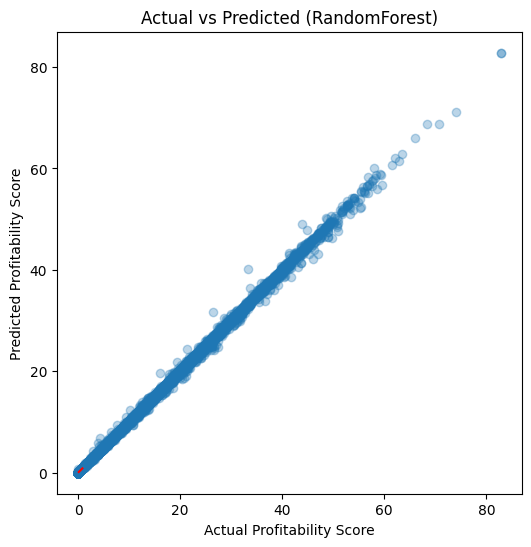

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Profitability Score")
plt.ylabel("Predicted Profitability Score")
plt.title("Actual vs Predicted (RandomForest)")
plt.plot([0,1], [0,1], 'r--')  # perfect prediction line
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Instead of y (array), keep it as a Pandas Series with indices
y = df["profitability_score"]

# Split (keeping Pandas objects, not arrays)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
# Predict on first 10 test samples
sample_idx = y_test.index[:10]
sample_preds = rf.predict(X_test[:10])

# Build DataFrame with product info
sample_results = pd.DataFrame({
    "Product": df.loc[sample_idx, "name"].values,
    "Category": df.loc[sample_idx, "main_category"].values,
    "Actual_Profitability": y_test.values[:10],
    "Predicted_Profitability": sample_preds
})

print(sample_results)


                                             Product             Category  \
0          REGAL Imperio Men Leather Formal Slip Ons          men's shoes   
1                                Pocket Watch (Gold)          accessories   
2  Shining Diva Fashion Latest Stylish Traditiona...          accessories   
3  BRIDA Cotton Rich Non Padded Non Wired-Extra S...     women's clothing   
4                        Casual Classic wedge sandal        women's shoes   
5      Hopscotch Boys TRP Solid Shoes in Black Color          men's shoes   
6  Synqe Nylon Braided USB Data Sync & 3A Fast Ch...  tv, audio & cameras   
7   TIMEX Analog Silver Dial Women's Watch-TWEL11813          accessories   
8  LYMI LABEL Womens Georgette Sequence Saree wit...               stores   
9  FIMS - Fashion is my style Women Padded Set Co...     women's clothing   

   Actual_Profitability  Predicted_Profitability  
0                  0.00                   0.0000  
1                 10.94                  10.8782  

In [ ]:
# Cell: list top main_category values so you can pick
top_cats = df['main_category'].value_counts().head(30)
print(top_cats)


main_category
accessories                222342
women's clothing           151624
men's clothing             147556
tv, audio & cameras        132714
men's shoes                109726
stores                      64670
appliances                  62652
home & kitchen              28946
kids' fashion               26412
sports & fitness            24506
bags & luggage              19964
beauty & health             19816
car & motorbike             13974
toys & baby products        12196
women's shoes               10514
industrial supplies          8020
grocery & gourmet foods      6564
pet supplies                 3238
music                        2076
home, kitchen, pets            34
Name: count, dtype: int64


In [ ]:
# See unique categories in your dataset
print(df['main_category'].unique()[:50])  # show first 50 unique categories
print("Total categories:", df['main_category'].nunique())


['home & kitchen' 'car & motorbike' 'appliances' 'tv, audio & cameras'
 'stores' 'pet supplies' 'sports & fitness' 'grocery & gourmet foods'
 'toys & baby products' "kids' fashion" 'bags & luggage' 'accessories'
 "women's shoes" 'beauty & health' "men's shoes" "women's clothing"
 'industrial supplies' "men's clothing" 'music' 'home, kitchen, pets']
Total categories: 20


          ds          y
0 2023-10-01  747781.86
1 2023-11-01  677612.36
2 2023-12-01  607382.17
3 2024-01-01  552251.02
4 2024-02-01  540488.46


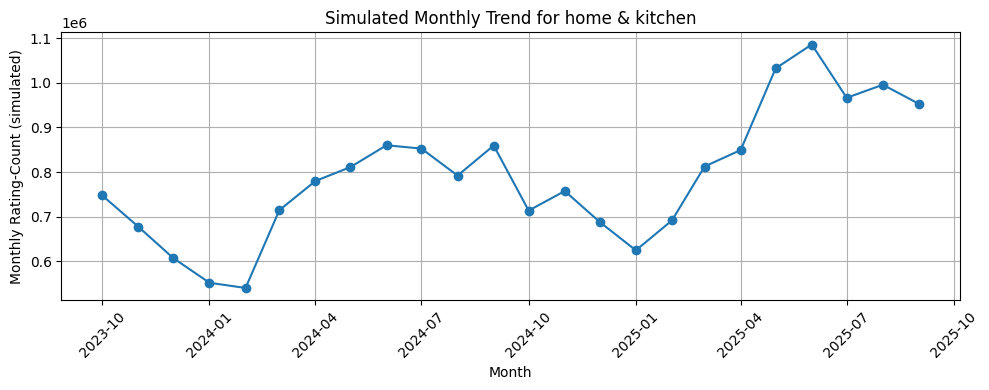

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

# -----------------------------
# Function to generate monthly trend series
# -----------------------------
def make_category_monthly_series(df, category, months=24, seed=42, trend_strength=0.02, seasonality_strength=0.15):
    """
    Returns a DataFrame with columns: ds (month start), y (aggregated monthly count for category).
    months: how many months in the past (including current month) to simulate
    trend_strength: linear monthly growth fraction (0.02 = 2% growth per month)
    seasonality_strength: amplitude of monthly seasonality relative to mean
    """
    rng = np.random.RandomState(seed)
    # subset products in category
    cat_df = df[df['main_category'] == category].copy()
    if cat_df.shape[0] == 0:
        raise ValueError("No products found for category: " + str(category))

    # timeline: month starts (oldest -> newest)
    end = pd.Timestamp.today().replace(day=1)
    months_list = [end - relativedelta(months=(months-1 - i)) for i in range(months)]
    months_idx = np.arange(months)

    monthly_totals = np.zeros(months, dtype=float)

    for _, row in cat_df.iterrows():
        total = int(row.get('no_of_ratings', 0))  # total count to split
        if total <= 0:
            base = rng.poisson(0.2, size=months)
            monthly_totals += base
            continue
        # Dirichlet partition so it sums to 1, then scale to total
        alpha = np.ones(months) * 0.5
        weights = rng.dirichlet(alpha)
        trend_multiplier = 1 + trend_strength * months_idx
        weights = weights * trend_multiplier
        weights = weights / weights.sum()
        prod_month = weights * total
        monthly_totals += prod_month

    # Apply seasonality
    season = 1 + seasonality_strength * np.sin(2 * np.pi * (months_idx % 12) / 12.0 + rng.uniform(0, 2*np.pi))
    monthly_totals = monthly_totals * season

    # Add small random noise
    noise = rng.normal(loc=0.0, scale=np.maximum(1.0, monthly_totals * 0.05), size=months)
    monthly_totals = np.maximum(0, monthly_totals + noise)

    # Build DataFrame
    df_ts = pd.DataFrame({
        'ds': months_list,
        'y': monthly_totals
    })
    # normalize ds to month start (midnight)
    df_ts['ds'] = pd.to_datetime(df_ts['ds']).dt.to_period('M').dt.to_timestamp()
    df_ts['y'] = df_ts['y'].round(2)
    return df_ts

# -----------------------------
# Example usage
# -----------------------------
cat = "home & kitchen"   # pick a category
df_cat_ts = make_category_monthly_series(df, cat, months=24)
print(df_cat_ts.head())

# Plot the trend
plt.figure(figsize=(10,4))
plt.plot(df_cat_ts['ds'], df_cat_ts['y'], marker='o', color="tab:blue")
plt.title(f"Simulated Monthly Trend for {cat}")
plt.xlabel("Month")
plt.ylabel("Monthly Rating-Count (simulated)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# in Colab cell
!pip install -q prophet


In [ ]:
# df_cat_ts is the DataFrame from 5A with ds,y (monthly)
h = 6  # forecast horizon in months
train_df = df_cat_ts.iloc[:-h].copy()
test_df = df_cat_ts.iloc[-h:].copy()
print("Train months:", len(train_df), "Test months:", len(test_df))


Train months: 18 Test months: 6


In [ ]:
from prophet import Prophet

m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
m.fit(train_df)

future = m.make_future_dataframe(periods=h, freq='M')  # months
forecast = m.predict(future)
# forecast contains yhat, yhat_lower, yhat_upper
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(h+3)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/badrno3r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/s6g0mr5f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66804', 'data', 'file=/tmp/tmpzqr3yyih/badrno3r.json', 'init=/tmp/tmpzqr3yyih/s6g0mr5f.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model0zmy67px/prophet_model-20250924103540.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:35:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:36:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.

,ds,yhat,yhat_lower,yhat_upper
15,2025-01-01,6.247947e+05,6.247947e+05,6.247947e+05
16,2025-02-01,6.918224e+05,6.918224e+05,6.918224e+05
17,2025-03-01,8.125529e+05,8.125529e+05,8.125529e+05
18,2025-03-31,7.285607e+05,7.285243e+05,7.285986e+05
19,2025-04-30,1.096403e+06,1.096298e+06,1.096524e+06
20,2025-05-31,7.046446e+05,7.044273e+05,7.048707e+05
21,2025-06-30,1.180241e+06,1.179895e+06,1.180601e+06
22,2025-07-31,4.406160e+05,4.401331e+05,4.411140e+05
23,2025-08-31,1.080052e+06,1.079415e+06,1.080714e+06


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

def make_category_monthly_series(df, category, months=24, seed=42, trend_strength=0.02, seasonality_strength=0.15):
    """
    Returns a DataFrame with columns: ds (month start), y (aggregated monthly count for category).
    months: how many months in the past (including current month) to simulate
    trend_strength: linear monthly growth fraction (0.02 = 2% growth per month)
    seasonality_strength: amplitude of monthly seasonality relative to mean
    """
    rng = np.random.RandomState(seed)

    # subset products in category
    cat_df = df[df['main_category'] == category].copy()
    if cat_df.shape[0] == 0:
        raise ValueError("No products found for category: " + str(category))

    # timeline: month starts (oldest -> newest)
    end = pd.Timestamp.today().replace(day=1)
    months_list = [end - relativedelta(months=(months-1 - i)) for i in range(months)]
    months_idx = np.arange(months)

    # We'll sum contributions from every product
    monthly_totals = np.zeros(months, dtype=float)

    for _, row in cat_df.iterrows():
        total = int(row.get('no_of_ratings', 0))  # total count to split
        if total <= 0:
            base = rng.poisson(0.2, size=months)  # small noise for unrated products
            monthly_totals += base
            continue

        # Dirichlet partition so it sums to 1, then scale to total
        alpha = np.ones(months) * 0.5
        weights = rng.dirichlet(alpha)

        # apply trend: multiply weights by (1 + trend_strength * month_index)
        trend_multiplier = 1 + trend_strength * months_idx
        weights = weights * trend_multiplier
        weights = weights / weights.sum()
        prod_month = weights * total
        monthly_totals += prod_month

    # apply seasonality (sinusoidal 12-month)
    season = 1 + seasonality_strength * np.sin(2 * np.pi * (months_idx % 12) / 12.0 + rng.uniform(0, 2*np.pi))
    monthly_totals = monthly_totals * season

    # add small random noise
    noise = rng.normal(loc=0.0, scale=np.maximum(1.0, monthly_totals * 0.05), size=months)
    monthly_totals = np.maximum(0, monthly_totals + noise)

    # Build DataFrame
    df_ts = pd.DataFrame({
        'ds': months_list,
        'y': monthly_totals
    })

    # round counts
    df_ts['y'] = df_ts['y'].round(2)

    # ✅ normalize dates to month-start at midnight (important for Prophet)
    df_ts['ds'] = pd.to_datetime(df_ts['ds']).dt.to_period('M').dt.to_timestamp()

    return df_ts


Shape: (24, 2)
          ds          y
0 2023-10-01  747781.86
1 2023-11-01  677612.36
2 2023-12-01  607382.17
3 2024-01-01  552251.02
4 2024-02-01  540488.46


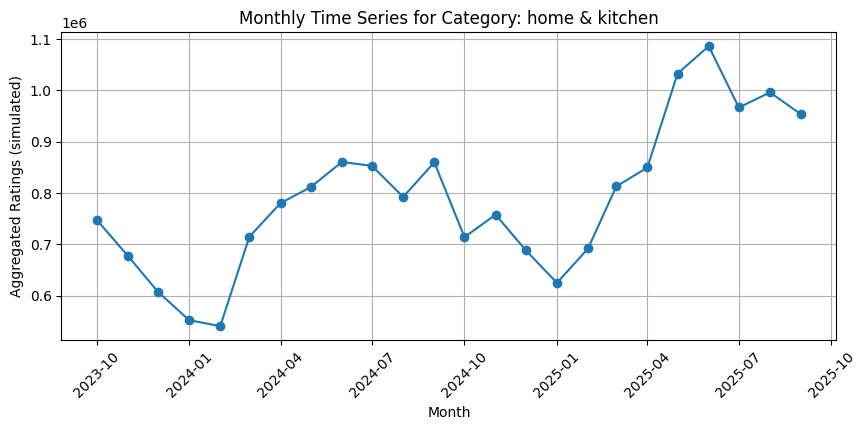

In [ ]:
# ✅ Test Example with "home & kitchen"

# pick one category from your dataset
cat = "home & kitchen"

# generate synthetic monthly series for 24 months
df_cat_ts = make_category_monthly_series(df, cat, months=24)

print("Shape:", df_cat_ts.shape)
print(df_cat_ts.head())

# quick visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df_cat_ts['ds'], df_cat_ts['y'], marker='o')
plt.title(f"Monthly Time Series for Category: {cat}")
plt.xlabel("Month")
plt.ylabel("Aggregated Ratings (simulated)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


INFO:prophet:n_changepoints greater than number of observations. Using 14.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/s6aeishl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/n4f4a_6e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65368', 'data', 'file=/tmp/tmpzqr3yyih/s6aeishl.json', 'init=/tmp/tmpzqr3yyih/n4f4a_6e.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modeldj9fls15/prophet_model-20250924103637.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:36:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:36:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Category: home & kitchen
MAE: 187091.3165098581
RMSE: 212592.09198295115


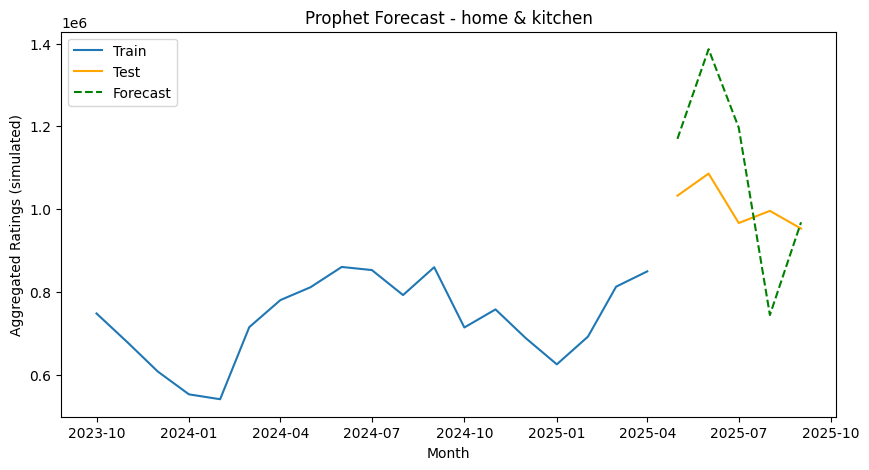

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# pick a category
cat = "home & kitchen"

# make time series
df_cat_ts = make_category_monthly_series(df, cat, months=24)

# train-test split
train_size = int(len(df_cat_ts) * 0.8)
train_df = df_cat_ts.iloc[:train_size].copy()
test_df  = df_cat_ts.iloc[train_size:].copy()

# ✅ normalize all dates to month start midnight
train_df['ds'] = pd.to_datetime(train_df['ds']).dt.to_period('M').dt.to_timestamp()
test_df['ds']  = pd.to_datetime(test_df['ds']).dt.to_period('M').dt.to_timestamp()

# fit Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(train_df)

# make future dataframe (cover train+test period)
future = model.make_future_dataframe(periods=len(test_df), freq='MS')  # MS = month start
forecast = model.predict(future)

# ✅ normalize forecast dates too
forecast['ds'] = pd.to_datetime(forecast['ds']).dt.to_period('M').dt.to_timestamp()

# evaluation
pred = forecast.set_index('ds').loc[test_df['ds'], 'yhat'].values
mae = mean_absolute_error(test_df['y'], pred)
rmse = np.sqrt(mean_squared_error(test_df['y'], pred))

print(f"Category: {cat}")
print("MAE:", mae)
print("RMSE:", rmse)

# plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(train_df['ds'], train_df['y'], label="Train")
plt.plot(test_df['ds'], test_df['y'], label="Test", color="orange")
plt.plot(test_df['ds'], pred, label="Forecast", color="green", linestyle="--")
plt.legend()
plt.title(f"Prophet Forecast - {cat}")
plt.xlabel("Month")
plt.ylabel("Aggregated Ratings (simulated)")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# get predicted values for test ds
pred = forecast.set_index('ds').loc[test_df['ds'], 'yhat'].values
mae = mean_absolute_error(test_df['y'], pred)
rmse = np.sqrt(mean_squared_error(test_df['y'], pred))
print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}")


MAE: 187091.317, RMSE: 212592.092


In [ ]:
# Get unique categories
categories = df['main_category'].unique().tolist()
print("Total categories:", len(categories))
print(categories[:5])  # show first 5


Total categories: 20
['home & kitchen', 'car & motorbike', 'appliances', 'tv, audio & cameras', 'stores']


In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def forecast_category(df, category, months=24, test_size=6):
    # make monthly series for this category
    df_cat_ts = make_category_monthly_series(df, category, months=months)
    df_cat_ts['ds'] = pd.to_datetime(df_cat_ts['ds']).dt.to_period('M').dt.to_timestamp()

    # split train/test
    train_df = df_cat_ts.iloc[:-test_size]
    test_df  = df_cat_ts.iloc[-test_size:]

    # normalize
    train_df['ds'] = pd.to_datetime(train_df['ds']).dt.to_period('M').dt.to_timestamp()
    test_df['ds']  = pd.to_datetime(test_df['ds']).dt.to_period('M').dt.to_timestamp()

    # train Prophet
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(train_df.rename(columns={'y':'y'}))

    # forecast into the future
    future = model.make_future_dataframe(periods=test_size, freq='M')
    forecast = model.predict(future)
    forecast['ds'] = pd.to_datetime(forecast['ds']).dt.to_period('M').dt.to_timestamp()

    # evaluation
    pred = forecast.set_index('ds').loc[test_df['ds'], 'yhat'].values
    mae = mean_absolute_error(test_df['y'], pred)
    rmse = np.sqrt(mean_squared_error(test_df['y'], pred))

    return mae, rmse, forecast, test_df


In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# ✅ Fixed forecast function
def forecast_category(df, category, months=24, test_size=6, seed=42):
    """
    Forecast category demand using Prophet
    """
    # Step 1: Make monthly time series
    df_cat_ts = make_category_monthly_series(df, category, months=months, seed=seed)

    # Step 2: Split train/test
    train_df = df_cat_ts.iloc[:-test_size].copy()
    test_df  = df_cat_ts.iloc[-test_size:].copy()

    # Step 3: Normalize ds column
    train_df['ds'] = pd.to_datetime(train_df['ds']).dt.to_period('M').dt.to_timestamp()
    test_df['ds']  = pd.to_datetime(test_df['ds']).dt.to_period('M').dt.to_timestamp()

    # Step 4: Train Prophet
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(train_df)

    # Step 5: Forecast (make sure we predict enough months ahead)
    future = model.make_future_dataframe(periods=test_size, freq='MS')  # MS = Month Start
    forecast = model.predict(future)

    # Step 6: Normalize forecast ds
    forecast['ds'] = pd.to_datetime(forecast['ds']).dt.to_period('M').dt.to_timestamp()

    # Step 7: Evaluation
    pred = forecast.set_index('ds').loc[test_df['ds'], 'yhat'].values
    mae = mean_absolute_error(test_df['y'], pred)
    rmse = np.sqrt(mean_squared_error(test_df['y'], pred))

    return mae, rmse, forecast, test_df


# ✅ Example run for one category
cat = "home & kitchen"
mae, rmse, forecast, test_df = forecast_category(df, cat, months=24, test_size=6)

print(f"Category: {cat}")
print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}")


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/mnev0iml.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/layirg7z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64383', 'data', 'file=/tmp/tmpzqr3yyih/mnev0iml.json', 'init=/tmp/tmpzqr3yyih/layirg7z.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelccper34z/prophet_model-20250924103702.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:37:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:37:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Category: home & kitchen
MAE: 94455.603, RMSE: 129997.405


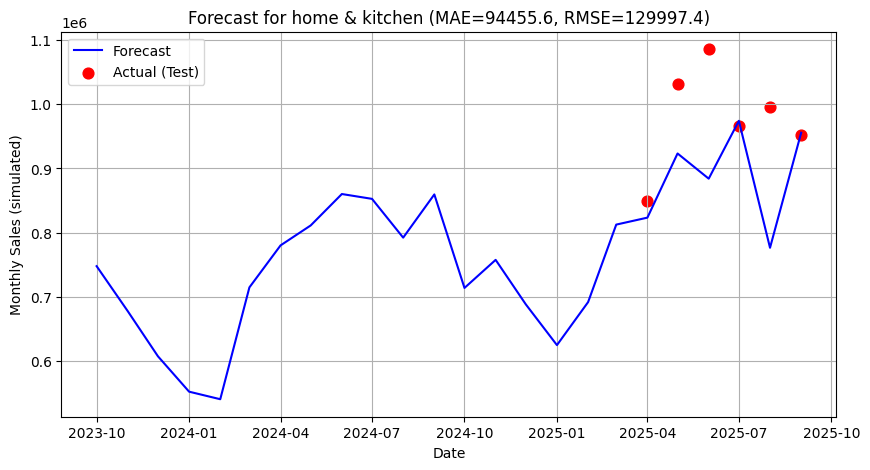

In [ ]:
import matplotlib.pyplot as plt

# Plot forecast vs actual
plt.figure(figsize=(10,5))
plt.plot(forecast['ds'], forecast['yhat'], label="Forecast", color="blue")
plt.scatter(test_df['ds'], test_df['y'], color="red", label="Actual (Test)", s=60)
plt.legend()
plt.title(f"Forecast for {cat} (MAE={mae:.1f}, RMSE={rmse:.1f})")
plt.xlabel("Date")
plt.ylabel("Monthly Sales (simulated)")
plt.grid(True)
plt.show()


In [ ]:
results = []

for cat in categories:
    try:
        mae, rmse, forecast, test_df = forecast_category(df, cat, months=24, test_size=6)
        results.append({
            "Category": cat,
            "MAE": mae,
            "RMSE": rmse
        })
        print(f"✅ {cat} done (MAE={mae:.1f}, RMSE={rmse:.1f})")
    except Exception as e:
        print(f"❌ {cat} failed: {e}")

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by="RMSE", ascending=True)
print("\n--- Forecast Performance by Category ---\n")
print(results_df)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/h29q10y0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/4xkij5sn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56000', 'data', 'file=/tmp/tmpzqr3yyih/h29q10y0.json', 'init=/tmp/tmpzqr3yyih/4xkij5sn.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modeln5kwqvck/prophet_model-20250924103719.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:37:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:37:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ home & kitchen done (MAE=94455.6, RMSE=129997.4)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/avjvktyr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/_yzdeesi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19255', 'data', 'file=/tmp/tmpzqr3yyih/avjvktyr.json', 'init=/tmp/tmpzqr3yyih/_yzdeesi.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modeltdn6o43r/prophet_model-20250924103734.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:37:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:37:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ car & motorbike done (MAE=50300.9, RMSE=54425.5)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/bt58uqk9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/0mg_1cvn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37331', 'data', 'file=/tmp/tmpzqr3yyih/bt58uqk9.json', 'init=/tmp/tmpzqr3yyih/0mg_1cvn.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelpilvq8hl/prophet_model-20250924103753.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:37:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:38:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ appliances done (MAE=189256.8, RMSE=223428.3)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/w2ujppus.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/o_get1d4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2870', 'data', 'file=/tmp/tmpzqr3yyih/w2ujppus.json', 'init=/tmp/tmpzqr3yyih/o_get1d4.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelais_mgk3/prophet_model-20250924103820.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:38:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:38:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ tv, audio & cameras done (MAE=2249094.1, RMSE=2653991.3)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/f_0nj7lz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/avi8u9ol.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61780', 'data', 'file=/tmp/tmpzqr3yyih/f_0nj7lz.json', 'init=/tmp/tmpzqr3yyih/avi8u9ol.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model850r07rg/prophet_model-20250924103839.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:38:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:38:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ stores done (MAE=557062.0, RMSE=666158.5)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/ystxgoqh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/n7sm4h3t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30596', 'data', 'file=/tmp/tmpzqr3yyih/ystxgoqh.json', 'init=/tmp/tmpzqr3yyih/n7sm4h3t.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modely12pehh6/prophet_model-20250924103853.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:38:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:39:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ pet supplies done (MAE=23855.8, RMSE=26105.8)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/uiyoxg5k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/_qqu14hj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60876', 'data', 'file=/tmp/tmpzqr3yyih/uiyoxg5k.json', 'init=/tmp/tmpzqr3yyih/_qqu14hj.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model_u30otj7/prophet_model-20250924103909.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:39:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:39:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ sports & fitness done (MAE=60560.7, RMSE=62669.5)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/vd53ppkg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/adi5_sh1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28682', 'data', 'file=/tmp/tmpzqr3yyih/vd53ppkg.json', 'init=/tmp/tmpzqr3yyih/adi5_sh1.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelcwvvarq4/prophet_model-20250924103915.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:39:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:39:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ grocery & gourmet foods done (MAE=28113.0, RMSE=29580.4)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/uv_di752.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/csmb53hv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5759', 'data', 'file=/tmp/tmpzqr3yyih/uv_di752.json', 'init=/tmp/tmpzqr3yyih/csmb53hv.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelct6u9wui/prophet_model-20250924103930.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:39:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:39:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ toys & baby products done (MAE=106672.9, RMSE=127931.5)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/q240csaf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/ft2xe5gq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74791', 'data', 'file=/tmp/tmpzqr3yyih/q240csaf.json', 'init=/tmp/tmpzqr3yyih/ft2xe5gq.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelh43lxd65/prophet_model-20250924103949.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:39:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:40:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ kids' fashion done (MAE=42308.2, RMSE=46887.2)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/rc7_4h03.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/01oxqzav.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32787', 'data', 'file=/tmp/tmpzqr3yyih/rc7_4h03.json', 'init=/tmp/tmpzqr3yyih/01oxqzav.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelsuvdr9pd/prophet_model-20250924104008.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:40:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:40:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ bags & luggage done (MAE=98207.8, RMSE=127326.8)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/7_a8wjdb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/w17ffsvl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78013', 'data', 'file=/tmp/tmpzqr3yyih/7_a8wjdb.json', 'init=/tmp/tmpzqr3yyih/w17ffsvl.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelpov4ne4c/prophet_model-20250924104048.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:40:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:40:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ accessories done (MAE=1730973.1, RMSE=2119390.7)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/w6bz8smc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/n0n1dfbk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87577', 'data', 'file=/tmp/tmpzqr3yyih/w6bz8smc.json', 'init=/tmp/tmpzqr3yyih/n0n1dfbk.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model41zqt0qm/prophet_model-20250924104049.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:40:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:41:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ women's shoes done (MAE=17055.6, RMSE=18110.9)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/et3rhogy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/2b17ser1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11498', 'data', 'file=/tmp/tmpzqr3yyih/et3rhogy.json', 'init=/tmp/tmpzqr3yyih/2b17ser1.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelg7ichtjh/prophet_model-20250924104105.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:41:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:41:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ beauty & health done (MAE=120370.7, RMSE=142108.8)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/46kstoae.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/0x9nkmgl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84014', 'data', 'file=/tmp/tmpzqr3yyih/46kstoae.json', 'init=/tmp/tmpzqr3yyih/0x9nkmgl.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model1w3wom78/prophet_model-20250924104128.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:41:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:41:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ men's shoes done (MAE=71408.3, RMSE=81165.0)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/g0lf1ylw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/j61y3vtb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18150', 'data', 'file=/tmp/tmpzqr3yyih/g0lf1ylw.json', 'init=/tmp/tmpzqr3yyih/j61y3vtb.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modellllp678r/prophet_model-20250924104158.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:41:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:42:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ women's clothing done (MAE=105339.9, RMSE=127088.8)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/3uwi1uiy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/0wpx2nnh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25419', 'data', 'file=/tmp/tmpzqr3yyih/3uwi1uiy.json', 'init=/tmp/tmpzqr3yyih/0wpx2nnh.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelp2u1x3wq/prophet_model-20250924104212.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:42:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:42:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ industrial supplies done (MAE=33393.9, RMSE=36874.5)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/hz1o_bnr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/x35br33u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81962', 'data', 'file=/tmp/tmpzqr3yyih/hz1o_bnr.json', 'init=/tmp/tmpzqr3yyih/x35br33u.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelcs_d6ri6/prophet_model-20250924104246.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:42:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:42:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ men's clothing done (MAE=209320.9, RMSE=248453.5)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/2gmyrw4m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/dko8p3jk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22556', 'data', 'file=/tmp/tmpzqr3yyih/2gmyrw4m.json', 'init=/tmp/tmpzqr3yyih/dko8p3jk.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modela2qwu42u/prophet_model-20250924104248.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:42:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:43:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/j6xjqp9a.json
DEBUG:cmdstanpy:input tempfi

✅ music done (MAE=6089.1, RMSE=7687.9)


10:43:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ home, kitchen, pets done (MAE=3.9, RMSE=6.2)

--- Forecast Performance by Category ---

                   Category           MAE          RMSE
19      home, kitchen, pets  3.930834e+00  6.199009e+00
18                    music  6.089127e+03  7.687935e+03
12            women's shoes  1.705557e+04  1.811091e+04
5              pet supplies  2.385581e+04  2.610584e+04
7   grocery & gourmet foods  2.811304e+04  2.958041e+04
16      industrial supplies  3.339392e+04  3.687453e+04
9             kids' fashion  4.230820e+04  4.688722e+04
1           car & motorbike  5.030088e+04  5.442554e+04
6          sports & fitness  6.056071e+04  6.266950e+04
14              men's shoes  7.140828e+04  8.116503e+04
15         women's clothing  1.053399e+05  1.270888e+05
10           bags & luggage  9.820779e+04  1.273268e+05
8      toys & baby products  1.066729e+05  1.279315e+05
0            home & kitchen  9.445560e+04  1.299974e+05
13          beauty & health  1.203707e+05  1.421088e+05
2             

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(1, y_true))) * 100

results = []

for cat in categories:
    try:
        mae, rmse, forecast, test_df = forecast_category(df, cat, months=24, test_size=6)
        pred = forecast.set_index("ds").loc[test_df["ds"], "yhat"].values
        mape = mean_absolute_percentage_error(test_df["y"].values, pred)
        results.append({
            "Category": cat,
            "MAE": mae,
            "RMSE": rmse,
            "MAPE (%)": mape
        })
        print(f"✅ {cat} done (MAE={mae:.1f}, RMSE={rmse:.1f}, MAPE={mape:.2f}%)")
    except Exception as e:
        print(f"❌ {cat} failed: {e}")

results_df = pd.DataFrame(results).sort_values(by="MAPE (%)", ascending=True)
print("\n--- Forecast Performance by Category (with MAPE %) ---\n")
print(results_df)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/pg3yxjic.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/8j6lunjh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5328', 'data', 'file=/tmp/tmpzqr3yyih/pg3yxjic.json', 'init=/tmp/tmpzqr3yyih/8j6lunjh.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelgdiwhxte/prophet_model-20250924104318.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:43:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:43:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ home & kitchen done (MAE=94455.6, RMSE=129997.4, MAPE=9.22%)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/3xgp993m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/diy2gcb0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32347', 'data', 'file=/tmp/tmpzqr3yyih/3xgp993m.json', 'init=/tmp/tmpzqr3yyih/diy2gcb0.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model0fbd5cv_/prophet_model-20250924104333.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:43:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:43:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ car & motorbike done (MAE=50300.9, RMSE=54425.5, MAPE=34.47%)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/d_bg1ta7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/v9vf9l1u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45624', 'data', 'file=/tmp/tmpzqr3yyih/d_bg1ta7.json', 'init=/tmp/tmpzqr3yyih/v9vf9l1u.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model1h7u7ksh/prophet_model-20250924104353.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:43:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:44:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ appliances done (MAE=189256.8, RMSE=223428.3, MAPE=10.48%)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/vwa5b7xp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/uxhqorng.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97406', 'data', 'file=/tmp/tmpzqr3yyih/vwa5b7xp.json', 'init=/tmp/tmpzqr3yyih/uxhqorng.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model1l840k2w/prophet_model-20250924104420.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:44:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:44:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ tv, audio & cameras done (MAE=2249094.1, RMSE=2653991.3, MAPE=14.37%)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/soec5pc0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/zhbd2s_n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72991', 'data', 'file=/tmp/tmpzqr3yyih/soec5pc0.json', 'init=/tmp/tmpzqr3yyih/zhbd2s_n.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model4p4skzxt/prophet_model-20250924104440.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:44:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:44:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ stores done (MAE=557062.0, RMSE=666158.5, MAPE=25.90%)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/64725qss.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/768icd6e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64717', 'data', 'file=/tmp/tmpzqr3yyih/64725qss.json', 'init=/tmp/tmpzqr3yyih/768icd6e.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelqpm6mauy/prophet_model-20250924104454.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:44:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:45:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ pet supplies done (MAE=23855.8, RMSE=26105.8, MAPE=28.60%)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/0rcf09hh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/_fgso2u2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84860', 'data', 'file=/tmp/tmpzqr3yyih/0rcf09hh.json', 'init=/tmp/tmpzqr3yyih/_fgso2u2.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modellfsz0k4_/prophet_model-20250924104511.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:45:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:45:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ sports & fitness done (MAE=60560.7, RMSE=62669.5, MAPE=22.19%)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/vek9fo14.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/sjyvk8e1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82533', 'data', 'file=/tmp/tmpzqr3yyih/vek9fo14.json', 'init=/tmp/tmpzqr3yyih/sjyvk8e1.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelyki0w9st/prophet_model-20250924104517.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:45:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:45:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ grocery & gourmet foods done (MAE=28113.0, RMSE=29580.4, MAPE=20.58%)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/9uuisi59.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/30e7ac7m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2395', 'data', 'file=/tmp/tmpzqr3yyih/9uuisi59.json', 'init=/tmp/tmpzqr3yyih/30e7ac7m.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelgb_my184/prophet_model-20250924104531.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:45:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:45:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ toys & baby products done (MAE=106672.9, RMSE=127931.5, MAPE=9.55%)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/usf8r6w1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/g5um2ntx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67381', 'data', 'file=/tmp/tmpzqr3yyih/usf8r6w1.json', 'init=/tmp/tmpzqr3yyih/g5um2ntx.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelep92500e/prophet_model-20250924104547.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:45:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:46:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ kids' fashion done (MAE=42308.2, RMSE=46887.2, MAPE=23.52%)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/gej11zvw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/esrtiakw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23844', 'data', 'file=/tmp/tmpzqr3yyih/gej11zvw.json', 'init=/tmp/tmpzqr3yyih/esrtiakw.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model9sl15vf4/prophet_model-20250924104602.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:46:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:46:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ bags & luggage done (MAE=98207.8, RMSE=127326.8, MAPE=84.44%)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/lcewf0bp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/ew33i_b8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89702', 'data', 'file=/tmp/tmpzqr3yyih/lcewf0bp.json', 'init=/tmp/tmpzqr3yyih/ew33i_b8.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model3_yf2rsc/prophet_model-20250924104635.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:46:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:46:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ accessories done (MAE=1730973.1, RMSE=2119390.7, MAPE=149.00%)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/aurucyji.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/_ytm6xyb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37645', 'data', 'file=/tmp/tmpzqr3yyih/aurucyji.json', 'init=/tmp/tmpzqr3yyih/_ytm6xyb.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelppcr0tzt/prophet_model-20250924104636.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:46:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:46:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ women's shoes done (MAE=17055.6, RMSE=18110.9, MAPE=31.35%)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/dmlqtmrb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/9g5a0h4u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93739', 'data', 'file=/tmp/tmpzqr3yyih/dmlqtmrb.json', 'init=/tmp/tmpzqr3yyih/9g5a0h4u.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelf_xwr7fd/prophet_model-20250924104652.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:46:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:47:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ beauty & health done (MAE=120370.7, RMSE=142108.8, MAPE=11.39%)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/p2db06vq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/f70ee175.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91898', 'data', 'file=/tmp/tmpzqr3yyih/p2db06vq.json', 'init=/tmp/tmpzqr3yyih/f70ee175.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelq8t2fy4e/prophet_model-20250924104719.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:47:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:47:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ men's shoes done (MAE=71408.3, RMSE=81165.0, MAPE=14.28%)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/xa7c6hab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/890v_ad_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81604', 'data', 'file=/tmp/tmpzqr3yyih/xa7c6hab.json', 'init=/tmp/tmpzqr3yyih/890v_ad_.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelbvxa5eej/prophet_model-20250924104758.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:47:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:48:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ women's clothing done (MAE=105339.9, RMSE=127088.8, MAPE=7.60%)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/h71nlqpa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/e4pd49f4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71034', 'data', 'file=/tmp/tmpzqr3yyih/h71nlqpa.json', 'init=/tmp/tmpzqr3yyih/e4pd49f4.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelhw1aqu2c/prophet_model-20250924104812.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:48:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:48:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ industrial supplies done (MAE=33393.9, RMSE=36874.5, MAPE=36.26%)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/7zcwdyya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/y_5ed5hi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21626', 'data', 'file=/tmp/tmpzqr3yyih/7zcwdyya.json', 'init=/tmp/tmpzqr3yyih/y_5ed5hi.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model988vb2yz/prophet_model-20250924104840.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:48:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:48:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ men's clothing done (MAE=209320.9, RMSE=248453.5, MAPE=45.95%)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/klyiibpy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/imu7sx90.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62392', 'data', 'file=/tmp/tmpzqr3yyih/klyiibpy.json', 'init=/tmp/tmpzqr3yyih/imu7sx90.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model40_asln_/prophet_model-20250924104842.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:48:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:48:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/z1vwpar_.json
DEBUG:cmdstanpy:input tempfi

✅ music done (MAE=6089.1, RMSE=7687.9, MAPE=23.20%)


10:49:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ home, kitchen, pets done (MAE=3.9, RMSE=6.2, MAPE=52.04%)

--- Forecast Performance by Category (with MAPE %) ---

                   Category           MAE          RMSE    MAPE (%)
15         women's clothing  1.053399e+05  1.270888e+05    7.603783
0            home & kitchen  9.445560e+04  1.299974e+05    9.222585
8      toys & baby products  1.066729e+05  1.279315e+05    9.551818
2                appliances  1.892568e+05  2.234283e+05   10.475703
13          beauty & health  1.203707e+05  1.421088e+05   11.394541
14              men's shoes  7.140828e+04  8.116503e+04   14.275764
3       tv, audio & cameras  2.249094e+06  2.653991e+06   14.369661
7   grocery & gourmet foods  2.811304e+04  2.958041e+04   20.575525
6          sports & fitness  6.056071e+04  6.266950e+04   22.188614
18                    music  6.089127e+03  7.687935e+03   23.198301
9             kids' fashion  4.230820e+04  4.688722e+04   23.515191
4                    stores  5.570620e+05  6.661585e+05   25.898838

In [ ]:
import numpy as np

def preprocess_category_data(df, category):
    """
    Preprocess data for Prophet:
    - Filter category
    - Remove negative/zero sales
    - Log-transform sales
    - Clip extreme outliers
    """
    cat_df = df[df['Category'] == category].copy()

    # Step 1: Remove zero/negative sales
    cat_df = cat_df[cat_df['y'] > 0]

    # Step 2: Log-transform sales
    cat_df['y'] = np.log1p(cat_df['y'])

    # Step 3: Clip outliers (cap at 99th percentile)
    upper = cat_df['y'].quantile(0.99)
    cat_df['y'] = np.clip(cat_df['y'], None, upper)

    # Step 4: Ensure datetime format (monthly start)
    cat_df['ds'] = pd.to_datetime(cat_df['ds']).dt.to_period('M').dt.to_timestamp()

    return cat_df


In [ ]:
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

def forecast_category(df, category, months=24, test_size=6):
    """
    Forecast sales for a single category using Prophet with preprocessing:
    - Remove negative/zero sales
    - Log-transform sales
    - Clip outliers (99th percentile)
    - Normalize dates to month start
    """

    # Filter category
    cat_df = df[df['Category'] == category].copy()

    # Step 1: Remove zero/negative sales
    cat_df = cat_df[cat_df['y'] > 0]

    # Step 2: Log-transform sales
    cat_df['y'] = np.log1p(cat_df['y'])

    # Step 3: Clip outliers
    upper = cat_df['y'].quantile(0.99)
    cat_df['y'] = np.clip(cat_df['y'], None, upper)

    # Step 4: Normalize dates
    cat_df['ds'] = pd.to_datetime(cat_df['ds']).dt.to_period('M').dt.to_timestamp()

    # Train/test split
    train_df = cat_df.iloc[:-test_size].copy()
    test_df  = cat_df.iloc[-test_size:].copy()

    # Prophet model
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(train_df)

    # Forecast future
    future = model.make_future_dataframe(periods=test_size, freq='MS')
    forecast = model.predict(future)

    # Normalize forecast dates
    forecast['ds'] = pd.to_datetime(forecast['ds']).dt.to_period('M').dt.to_timestamp()

    # Align forecast & test sets
    forecast = forecast.set_index('ds').loc[test_df['ds']]
    forecast.reset_index(inplace=True)

    # Inverse log transform
    y_true = np.expm1(test_df['y'])
    y_pred = np.expm1(forecast['yhat'])

    # Evaluation
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)

    return mae, rmse, forecast, test_df


In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

def forecast_category(df, category, months=24, test_size=6):
    """
    df: original DataFrame with 'main_category', 'no_of_ratings', etc.
    category: the category to forecast
    months: how many months of historical data to simulate
    test_size: last N months to use for testing
    """
    # Filter category
    cat_df = df[df['main_category'] == category].copy()
    if cat_df.shape[0] == 0:
        raise ValueError(f"No products found for category: {category}")

    # Generate monthly series
    df_ts = make_category_monthly_series(cat_df, category, months=months)

    # Split train/test
    train_df = df_ts.iloc[:-test_size].copy()
    test_df = df_ts.iloc[-test_size:].copy()

    # Normalize dates to month start
    train_df['ds'] = pd.to_datetime(train_df['ds']).dt.to_period('M').dt.to_timestamp()
    test_df['ds'] = pd.to_datetime(test_df['ds']).dt.to_period('M').dt.to_timestamp()

    # Fit Prophet
    m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    m.fit(train_df)

    # Forecast
    future = m.make_future_dataframe(periods=test_size, freq='MS')  # 'MS' = month start
    forecast = m.predict(future)
    forecast['ds'] = pd.to_datetime(forecast['ds']).dt.to_period('M').dt.to_timestamp()

    # Keep only forecast for test period
    forecast_test = forecast[forecast['ds'].isin(test_df['ds'])].copy()

    # Metrics
    y_true = test_df['y'].values
    y_pred = forecast_test['yhat'].values
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    return mae, rmse, forecast_test, test_df


In [ ]:
categories = [
    'home & kitchen', 'car & motorbike', 'appliances', 'tv, audio & cameras',
    'stores', 'pet supplies', 'sports & fitness', 'grocery & gourmet foods',
    'toys & baby products', "kids' fashion", 'bags & luggage', 'accessories',
    "women's shoes", 'beauty & health', "men's shoes", "women's clothing",
    'industrial supplies', "men's clothing", 'music', 'home, kitchen, pets'
]

results = []

for cat in categories:
    try:
        mae, rmse, forecast, test_df = forecast_category(df, cat, months=24, test_size=6)
        mape = np.mean(np.abs((test_df['y'].values - forecast['yhat'].values) / (test_df['y'].values + 1e-8))) * 100
        results.append({
            'Category': cat,
            'MAE': mae,
            'RMSE': rmse,
            'MAPE (%)': mape
        })
        print(f"✅ Completed: {cat} | MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")
    except Exception as e:
        print(f"⚠️ Error with category {cat}: {e}")

# Convert to DataFrame for summary
results_df = pd.DataFrame(results).sort_values(by='MAE')
print("\n--- Forecast Performance by Category ---")
print(results_df)


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/1vepjqi1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/latnm84z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73491', 'data', 'file=/tmp/tmpzqr3yyih/1vepjqi1.json', 'init=/tmp/tmpzqr3yyih/latnm84z.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelx303gwul/prophet_model-20250924104912.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:49:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:49:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Completed: home & kitchen | MAE: 94455.60, RMSE: 129997.40, MAPE: 9.22%


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/cqw8fzbd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/h_nsz2uh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51099', 'data', 'file=/tmp/tmpzqr3yyih/cqw8fzbd.json', 'init=/tmp/tmpzqr3yyih/h_nsz2uh.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelhxfzgfl2/prophet_model-20250924104927.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:49:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:49:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Completed: car & motorbike | MAE: 50300.88, RMSE: 54425.54, MAPE: 34.47%


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/gt0stxec.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/tujqxs2r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48875', 'data', 'file=/tmp/tmpzqr3yyih/gt0stxec.json', 'init=/tmp/tmpzqr3yyih/tujqxs2r.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model3h9arl2e/prophet_model-20250924104946.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:49:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:49:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Completed: appliances | MAE: 189256.81, RMSE: 223428.32, MAPE: 10.48%


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/53fa4za0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/b2xv66rn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5458', 'data', 'file=/tmp/tmpzqr3yyih/53fa4za0.json', 'init=/tmp/tmpzqr3yyih/b2xv66rn.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelc9fg0vs_/prophet_model-20250924105013.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:50:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:50:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Completed: tv, audio & cameras | MAE: 2249094.14, RMSE: 2653991.27, MAPE: 14.37%


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/16ggm3ne.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/aqh61kzy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43345', 'data', 'file=/tmp/tmpzqr3yyih/16ggm3ne.json', 'init=/tmp/tmpzqr3yyih/aqh61kzy.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelz4lhpxh2/prophet_model-20250924105033.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:50:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:50:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Completed: stores | MAE: 557062.00, RMSE: 666158.46, MAPE: 25.90%


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/nhgycroa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/k6s6exwm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69665', 'data', 'file=/tmp/tmpzqr3yyih/nhgycroa.json', 'init=/tmp/tmpzqr3yyih/k6s6exwm.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modellfleaijt/prophet_model-20250924105047.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:50:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:51:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Completed: pet supplies | MAE: 23855.81, RMSE: 26105.84, MAPE: 28.60%


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/r18yi2pp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/mhldlsa6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61976', 'data', 'file=/tmp/tmpzqr3yyih/r18yi2pp.json', 'init=/tmp/tmpzqr3yyih/mhldlsa6.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model5m75ny8o/prophet_model-20250924105104.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:51:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:51:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Completed: sports & fitness | MAE: 60560.71, RMSE: 62669.50, MAPE: 22.19%


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/rhay7x6y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/d0z2ugez.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46987', 'data', 'file=/tmp/tmpzqr3yyih/rhay7x6y.json', 'init=/tmp/tmpzqr3yyih/d0z2ugez.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelrkhn8i3t/prophet_model-20250924105110.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:51:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:51:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Completed: grocery & gourmet foods | MAE: 28113.04, RMSE: 29580.41, MAPE: 20.58%


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/5s35c0cj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/pqfd9oqi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36815', 'data', 'file=/tmp/tmpzqr3yyih/5s35c0cj.json', 'init=/tmp/tmpzqr3yyih/pqfd9oqi.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model8zke4sde/prophet_model-20250924105131.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:51:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:51:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Completed: toys & baby products | MAE: 106672.94, RMSE: 127931.46, MAPE: 9.55%


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/dc6k99d0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/g4kmfzlh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68396', 'data', 'file=/tmp/tmpzqr3yyih/dc6k99d0.json', 'init=/tmp/tmpzqr3yyih/g4kmfzlh.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelic3wivsb/prophet_model-20250924105159.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:51:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:52:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Completed: kids' fashion | MAE: 42308.20, RMSE: 46887.22, MAPE: 23.52%


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/p99uh8bs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/4qxguq8t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96566', 'data', 'file=/tmp/tmpzqr3yyih/p99uh8bs.json', 'init=/tmp/tmpzqr3yyih/4qxguq8t.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelku1sukuj/prophet_model-20250924105222.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:52:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:52:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Completed: bags & luggage | MAE: 98207.79, RMSE: 127326.82, MAPE: 84.44%


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/vs6qefx4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/ssli2n62.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23573', 'data', 'file=/tmp/tmpzqr3yyih/vs6qefx4.json', 'init=/tmp/tmpzqr3yyih/ssli2n62.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelpwx2r9u1/prophet_model-20250924105304.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:53:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:53:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Completed: accessories | MAE: 1730973.05, RMSE: 2119390.75, MAPE: 149.00%


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/_0x4j1uc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/4n9dnzdh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25193', 'data', 'file=/tmp/tmpzqr3yyih/_0x4j1uc.json', 'init=/tmp/tmpzqr3yyih/4n9dnzdh.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelljlgoyva/prophet_model-20250924105305.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:53:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:53:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Completed: women's shoes | MAE: 17055.57, RMSE: 18110.91, MAPE: 31.35%


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/ya2u1jhk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/5aleueju.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14811', 'data', 'file=/tmp/tmpzqr3yyih/ya2u1jhk.json', 'init=/tmp/tmpzqr3yyih/5aleueju.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelzopeockl/prophet_model-20250924105322.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:53:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:53:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Completed: beauty & health | MAE: 120370.68, RMSE: 142108.78, MAPE: 11.39%


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/680_hbc8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/id2yrgkj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39216', 'data', 'file=/tmp/tmpzqr3yyih/680_hbc8.json', 'init=/tmp/tmpzqr3yyih/id2yrgkj.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model21spv2u6/prophet_model-20250924105346.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:53:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:53:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Completed: men's shoes | MAE: 71408.28, RMSE: 81165.03, MAPE: 14.28%


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/vronjfh1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/vvd6ixtf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66910', 'data', 'file=/tmp/tmpzqr3yyih/vronjfh1.json', 'init=/tmp/tmpzqr3yyih/vvd6ixtf.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelic_kgrwx/prophet_model-20250924105415.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:54:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:54:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Completed: women's clothing | MAE: 105339.89, RMSE: 127088.78, MAPE: 7.60%


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/7sdcgaxo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/_1lbci5o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79111', 'data', 'file=/tmp/tmpzqr3yyih/7sdcgaxo.json', 'init=/tmp/tmpzqr3yyih/_1lbci5o.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelyj87ztj0/prophet_model-20250924105429.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:54:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:54:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Completed: industrial supplies | MAE: 33393.92, RMSE: 36874.53, MAPE: 36.26%


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/g38z_rcx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/6rr995zo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38233', 'data', 'file=/tmp/tmpzqr3yyih/g38z_rcx.json', 'init=/tmp/tmpzqr3yyih/6rr995zo.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelbj2dns9r/prophet_model-20250924105456.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:54:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:54:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Completed: men's clothing | MAE: 209320.89, RMSE: 248453.46, MAPE: 45.95%


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/bg8j07io.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/ztkdrdr6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91523', 'data', 'file=/tmp/tmpzqr3yyih/bg8j07io.json', 'init=/tmp/tmpzqr3yyih/ztkdrdr6.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelt69xwgsd/prophet_model-20250924105458.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:54:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/jrsoespz.json
DEBUG:cmdstanpy:input tempfi

✅ Completed: music | MAE: 6089.13, RMSE: 7687.94, MAPE: 23.20%


10:55:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ Completed: home, kitchen, pets | MAE: 3.93, RMSE: 6.20, MAPE: 52.04%

--- Forecast Performance by Category ---
                   Category           MAE          RMSE    MAPE (%)
19      home, kitchen, pets  3.930834e+00  6.199009e+00   52.038631
18                    music  6.089127e+03  7.687935e+03   23.198301
12            women's shoes  1.705557e+04  1.811091e+04   31.347908
5              pet supplies  2.385581e+04  2.610584e+04   28.597320
7   grocery & gourmet foods  2.811304e+04  2.958041e+04   20.575525
16      industrial supplies  3.339392e+04  3.687453e+04   36.257195
9             kids' fashion  4.230820e+04  4.688722e+04   23.515191
1           car & motorbike  5.030088e+04  5.442554e+04   34.472637
6          sports & fitness  6.056071e+04  6.266950e+04   22.188614
14              men's shoes  7.140828e+04  8.116503e+04   14.275764
0            home & kitchen  9.445560e+04  1.299974e+05    9.222585
10           bags & luggage  9.820779e+04  1.273268e+05   84.437169
15 

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/n0de4bz9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/cr14loc7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66325', 'data', 'file=/tmp/tmpzqr3yyih/n0de4bz9.json', 'init=/tmp/tmpzqr3yyih/cr14loc7.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model6qkjj249/prophet_model-20250924105529.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:55:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


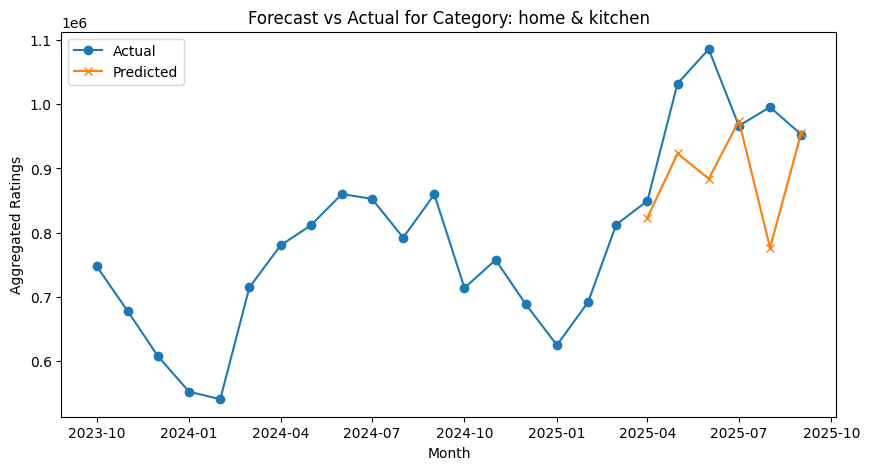

In [ ]:
import matplotlib.pyplot as plt

# Select the category you want to plot
cat = "home & kitchen"

# Generate the monthly series for this category
df_cat_ts = make_category_monthly_series(df, cat, months=24)

# Forecast the category using your forecast_category function
mae, rmse, forecast, test_df = forecast_category(df, cat, months=24, test_size=6)

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(df_cat_ts['ds'], df_cat_ts['y'], label='Actual', marker='o')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', marker='x')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.2, color='gray')
plt.title(f"Forecast vs Actual for Category: {cat}")
plt.xlabel("Month")
plt.ylabel("Aggregated Ratings")
plt.legend()
plt.show()


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/ldcw1z20.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/j9wu7zxc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12746', 'data', 'file=/tmp/tmpzqr3yyih/ldcw1z20.json', 'init=/tmp/tmpzqr3yyih/j9wu7zxc.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelfj4vdnm7/prophet_model-20250924105549.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:55:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:56:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


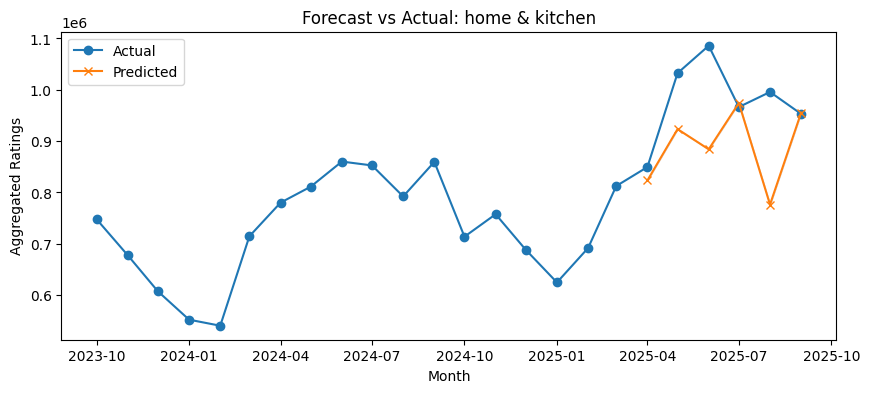

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/v7981ist.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/mnyx1ubn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36438', 'data', 'file=/tmp/tmpzqr3yyih/v7981ist.json', 'init=/tmp/tmpzqr3yyih/mnyx1ubn.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelfbbei1bb/prophet_model-20250924105606.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:56:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:56:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


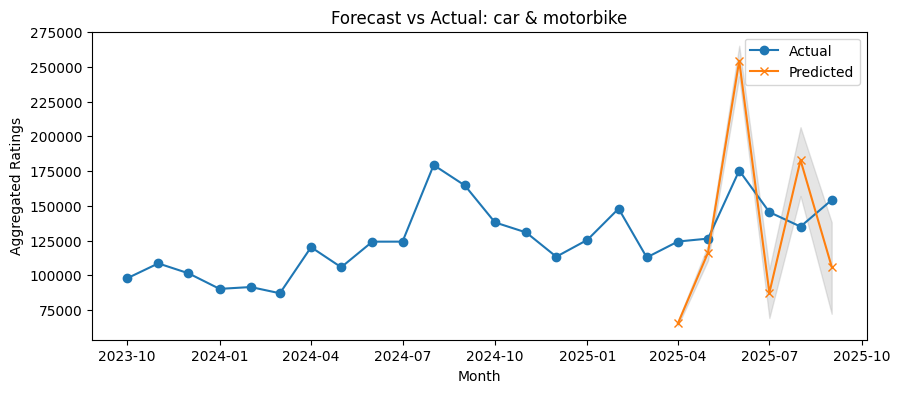

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/b4r4t6mi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/75bgk8wr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36474', 'data', 'file=/tmp/tmpzqr3yyih/b4r4t6mi.json', 'init=/tmp/tmpzqr3yyih/75bgk8wr.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelp3mnx1u6/prophet_model-20250924105631.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:56:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:56:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


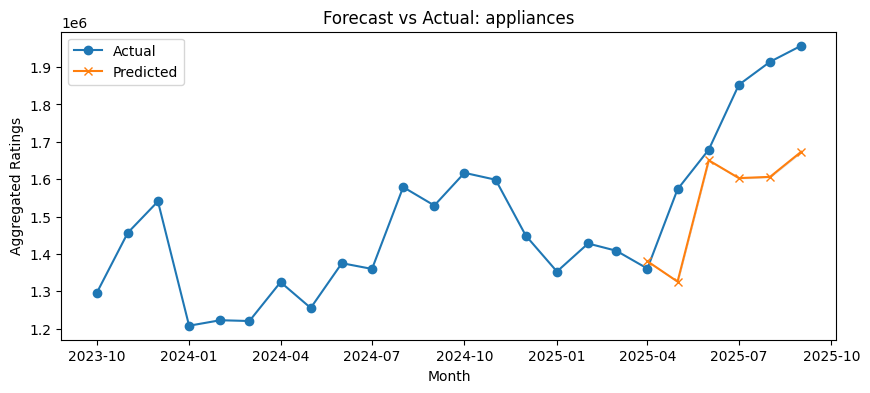

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/u_ls8t1n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/bsoqr8ql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72898', 'data', 'file=/tmp/tmpzqr3yyih/u_ls8t1n.json', 'init=/tmp/tmpzqr3yyih/bsoqr8ql.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model2mivo4m9/prophet_model-20250924105710.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:57:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:57:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


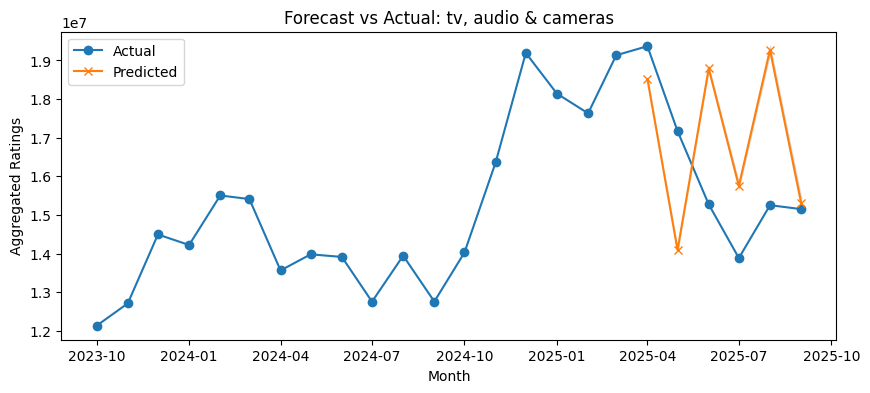

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/px46k93g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/4f3i4k9q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61316', 'data', 'file=/tmp/tmpzqr3yyih/px46k93g.json', 'init=/tmp/tmpzqr3yyih/4f3i4k9q.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model6ip316ok/prophet_model-20250924105736.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:57:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:57:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


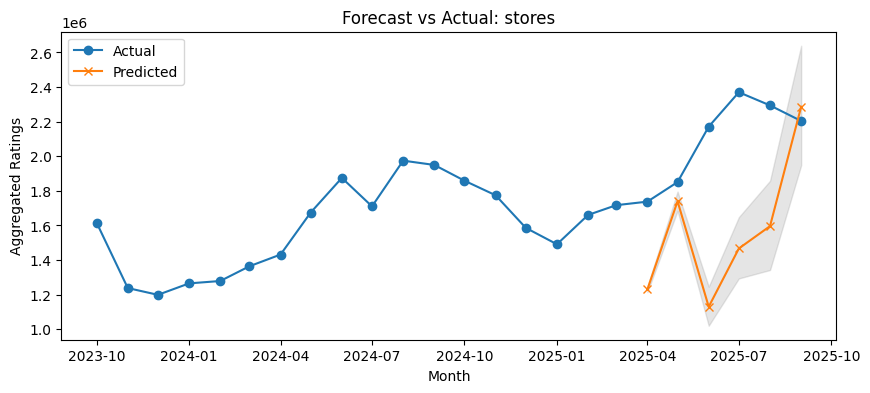

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/7cc67en5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/741mf80j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86822', 'data', 'file=/tmp/tmpzqr3yyih/7cc67en5.json', 'init=/tmp/tmpzqr3yyih/741mf80j.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modeli7gh2779/prophet_model-20250924105750.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:57:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:58:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


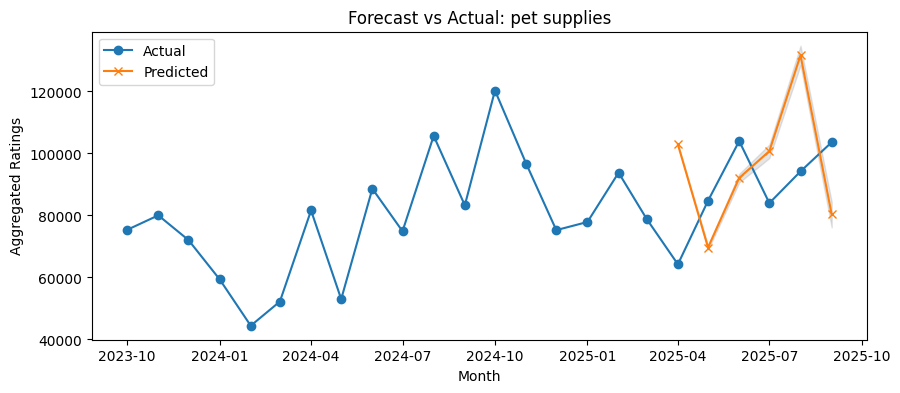

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/dub7qjz_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/u9qxh2px.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52507', 'data', 'file=/tmp/tmpzqr3yyih/dub7qjz_.json', 'init=/tmp/tmpzqr3yyih/u9qxh2px.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelvxketlwg/prophet_model-20250924105808.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:58:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:58:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


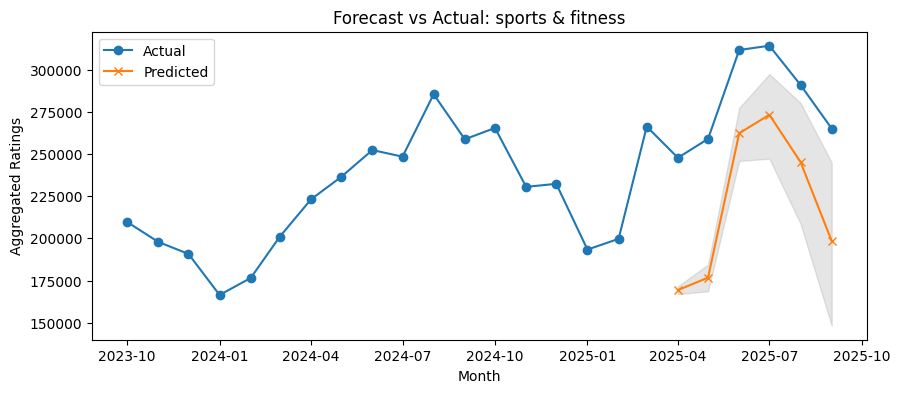

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/1pazk1wg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/ymn2yhcu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74881', 'data', 'file=/tmp/tmpzqr3yyih/1pazk1wg.json', 'init=/tmp/tmpzqr3yyih/ymn2yhcu.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modeljhckuf64/prophet_model-20250924105815.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:58:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:58:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


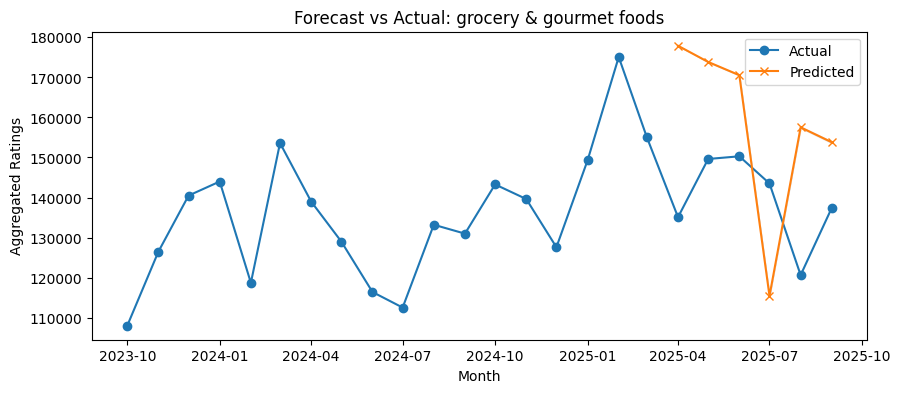

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/x2jo9zqo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/ldmqzbna.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50893', 'data', 'file=/tmp/tmpzqr3yyih/x2jo9zqo.json', 'init=/tmp/tmpzqr3yyih/ldmqzbna.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelx46g1qgy/prophet_model-20250924105831.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:58:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:58:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


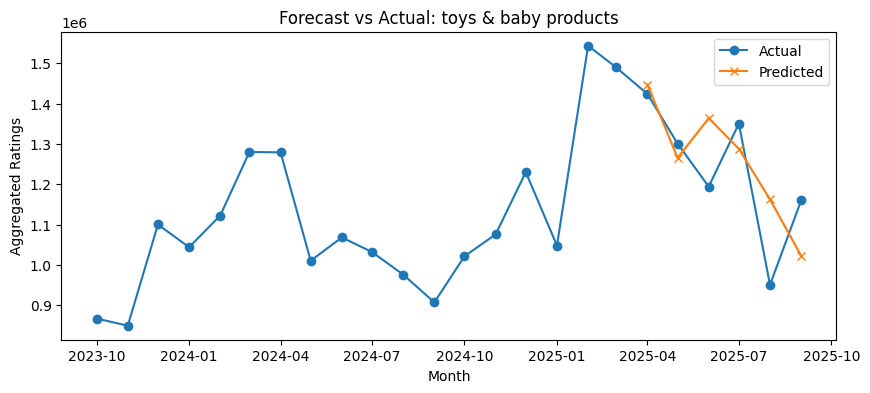

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/deml8kqd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/mwk8nqus.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54820', 'data', 'file=/tmp/tmpzqr3yyih/deml8kqd.json', 'init=/tmp/tmpzqr3yyih/mwk8nqus.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelddet81qj/prophet_model-20250924105849.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:58:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:59:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


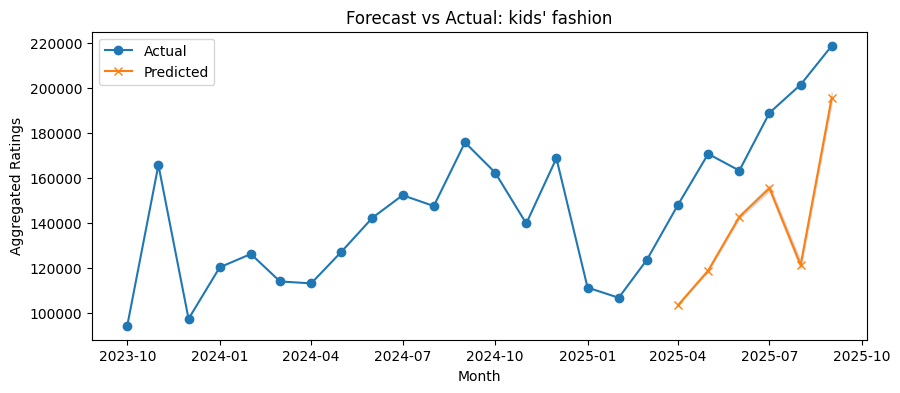

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/ifpb4i3g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/tep2y6zx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11408', 'data', 'file=/tmp/tmpzqr3yyih/ifpb4i3g.json', 'init=/tmp/tmpzqr3yyih/tep2y6zx.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelgt14wpp4/prophet_model-20250924105905.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:59:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:59:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


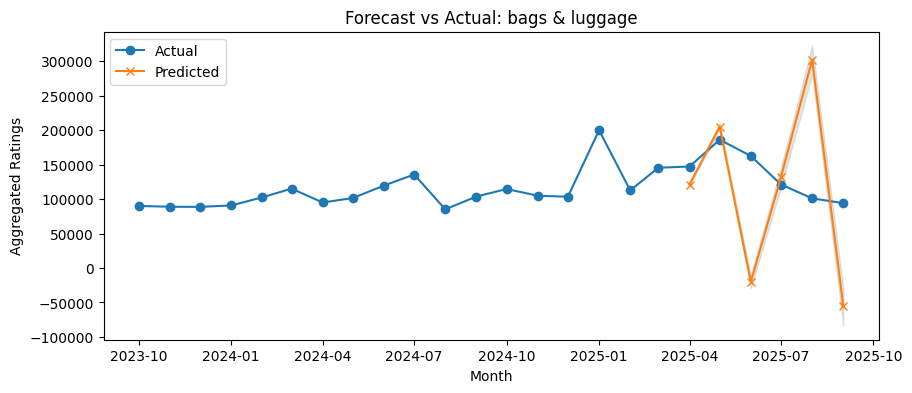

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/r71mygrn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/d4eyzdlr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89171', 'data', 'file=/tmp/tmpzqr3yyih/r71mygrn.json', 'init=/tmp/tmpzqr3yyih/d4eyzdlr.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelq_6wfrly/prophet_model-20250924105959.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:59:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:59:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


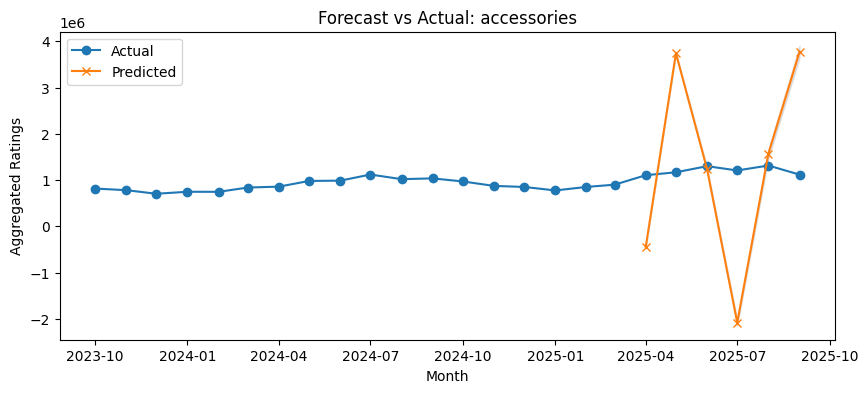

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/k5ou1jma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/9mtg1b6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91601', 'data', 'file=/tmp/tmpzqr3yyih/k5ou1jma.json', 'init=/tmp/tmpzqr3yyih/9mtg1b6_.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelme4id0qk/prophet_model-20250924110001.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:00:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:00:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


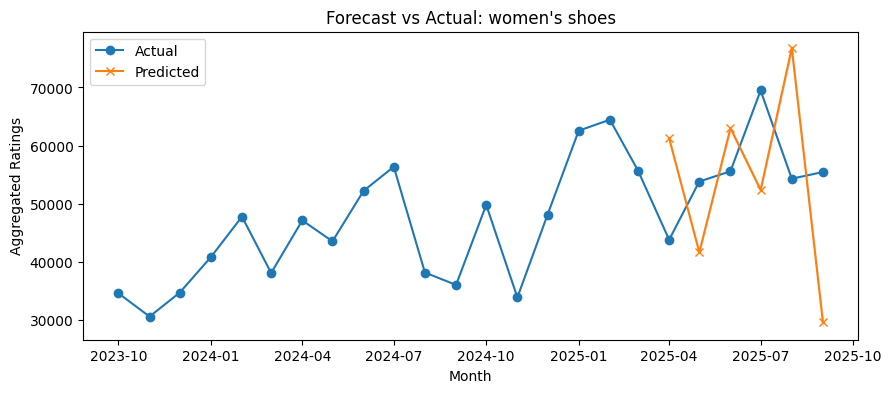

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/1oxwu88v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/hzf5i0ms.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53550', 'data', 'file=/tmp/tmpzqr3yyih/1oxwu88v.json', 'init=/tmp/tmpzqr3yyih/hzf5i0ms.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelunfv96xi/prophet_model-20250924110018.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:00:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:00:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


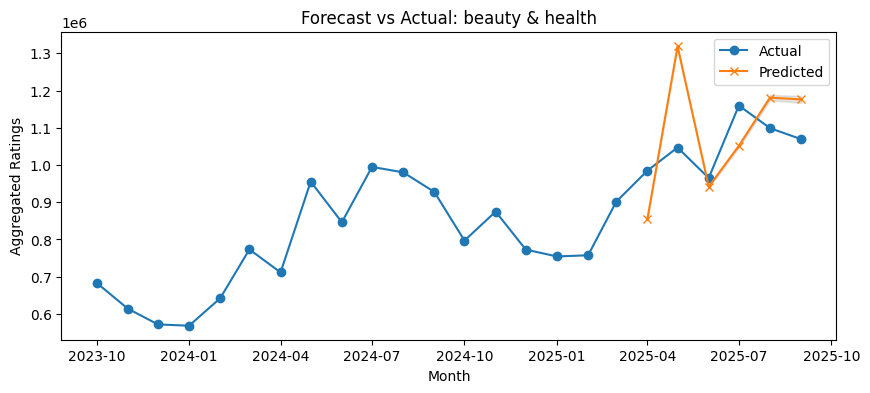

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/l4zturvg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/mtx4ue4u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30948', 'data', 'file=/tmp/tmpzqr3yyih/l4zturvg.json', 'init=/tmp/tmpzqr3yyih/mtx4ue4u.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model_pd8l777/prophet_model-20250924110051.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:00:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:01:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


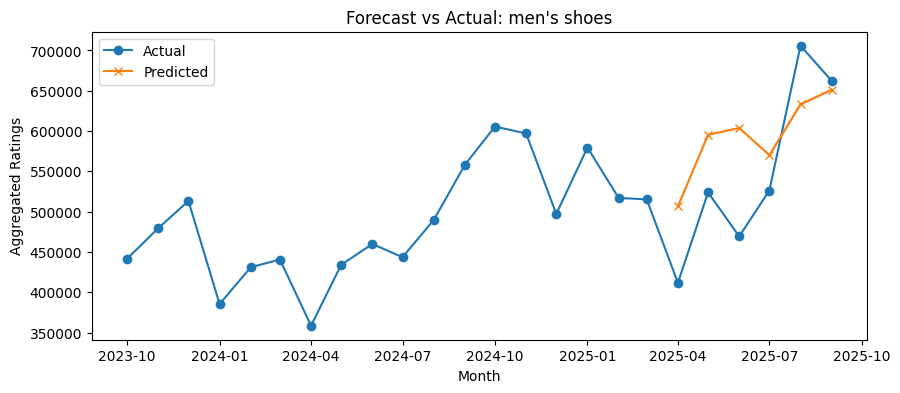

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/a96t1l_g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/9c4lolbe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12357', 'data', 'file=/tmp/tmpzqr3yyih/a96t1l_g.json', 'init=/tmp/tmpzqr3yyih/9c4lolbe.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelaqm6xtdp/prophet_model-20250924110134.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:01:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:01:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


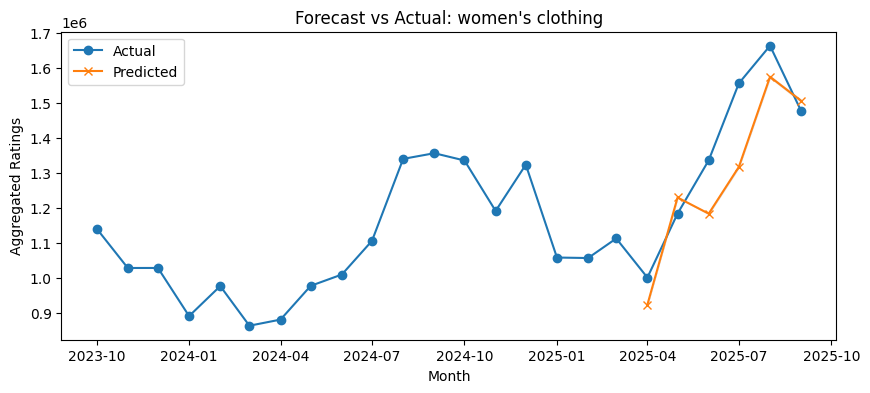

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/4e9otoxj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/rfecnvo_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23888', 'data', 'file=/tmp/tmpzqr3yyih/4e9otoxj.json', 'init=/tmp/tmpzqr3yyih/rfecnvo_.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model3y6d_evq/prophet_model-20250924110149.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:01:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:02:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


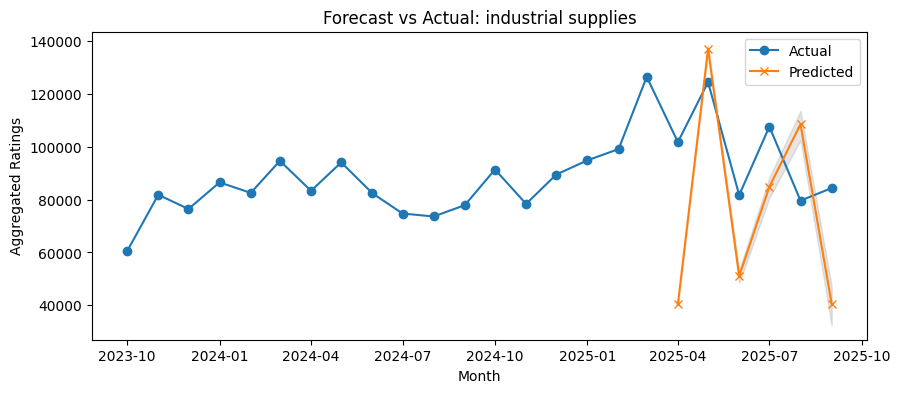

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/212b5czf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/7mc3unr3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45483', 'data', 'file=/tmp/tmpzqr3yyih/212b5czf.json', 'init=/tmp/tmpzqr3yyih/7mc3unr3.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_model5oxzmn2s/prophet_model-20250924110227.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:02:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:02:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


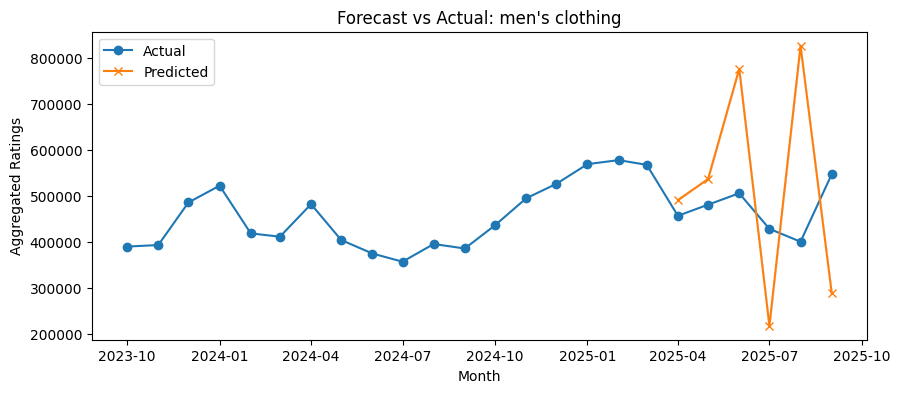

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/_1rnhxev.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/zl8m1e10.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19474', 'data', 'file=/tmp/tmpzqr3yyih/_1rnhxev.json', 'init=/tmp/tmpzqr3yyih/zl8m1e10.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelwvs6tv2e/prophet_model-20250924110230.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:02:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:02:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


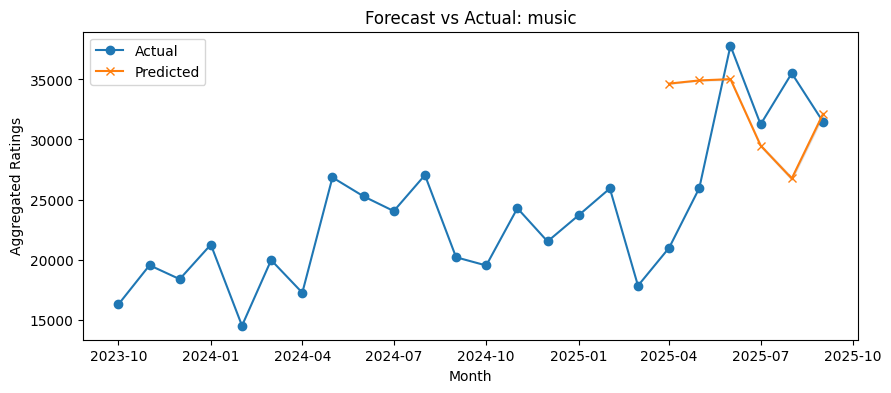

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/bil9b1k5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/tt05nu36.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61007', 'data', 'file=/tmp/tmpzqr3yyih/bil9b1k5.json', 'init=/tmp/tmpzqr3yyih/tt05nu36.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelaxvttbus/prophet_model-20250924110243.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:02:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:02:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


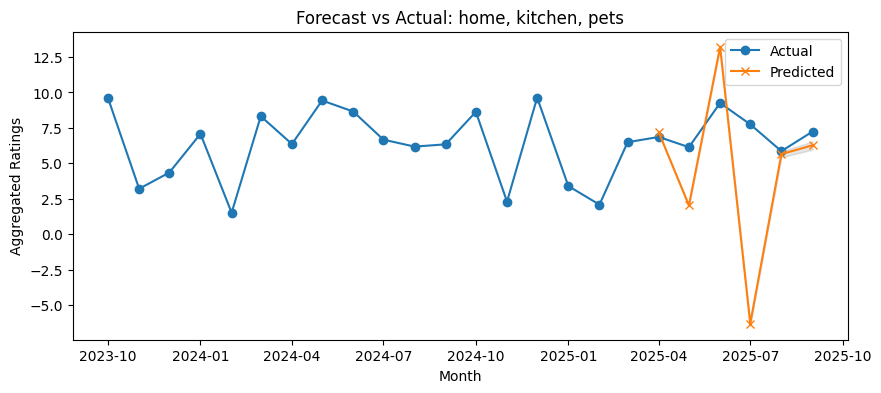

In [ ]:
categories = [
    'home & kitchen', 'car & motorbike', 'appliances', 'tv, audio & cameras',
    'stores', 'pet supplies', 'sports & fitness', 'grocery & gourmet foods',
    'toys & baby products', "kids' fashion", 'bags & luggage', 'accessories',
    "women's shoes", 'beauty & health', "men's shoes", "women's clothing",
    'industrial supplies', "men's clothing", 'music', 'home, kitchen, pets'
]

for cat in categories:
    try:
        # Prepare time series
        df_cat_ts = make_category_monthly_series(df, cat, months=24)

        # Forecast
        mae, rmse, forecast, test_df = forecast_category(df, cat, months=24, test_size=6)

        # Plot
        plt.figure(figsize=(10,4))
        plt.plot(df_cat_ts['ds'], df_cat_ts['y'], label='Actual', marker='o')
        plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', marker='x')
        plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.2, color='gray')
        plt.title(f"Forecast vs Actual: {cat}")
        plt.xlabel("Month")
        plt.ylabel("Aggregated Ratings")
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"⚠️ Error with category {cat}: {e}")


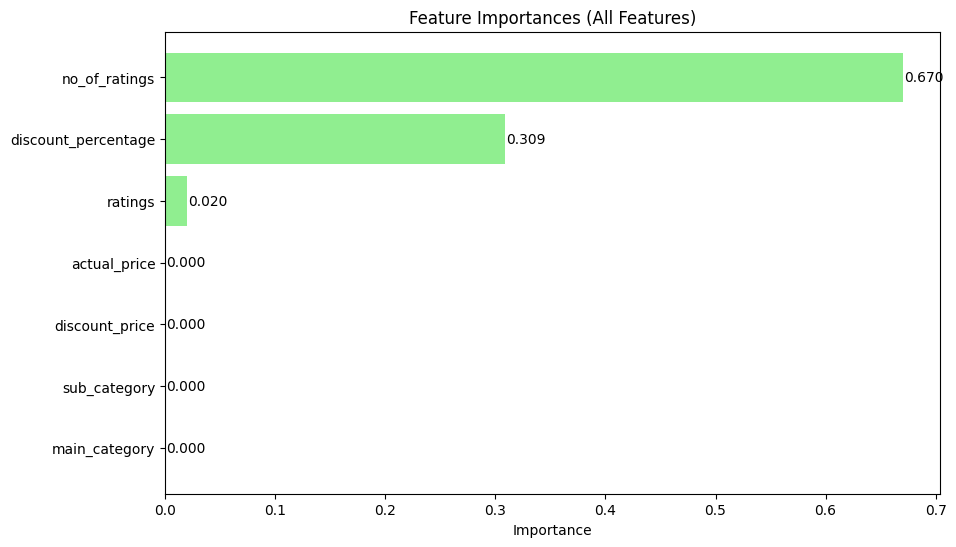

In [ ]:
import matplotlib.pyplot as plt

# Sort all features by importance descending
all_features = fi_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(all_features['Feature'], all_features['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.title('Feature Importances (All Features)')

# Add values at the end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', va='center')

plt.show()


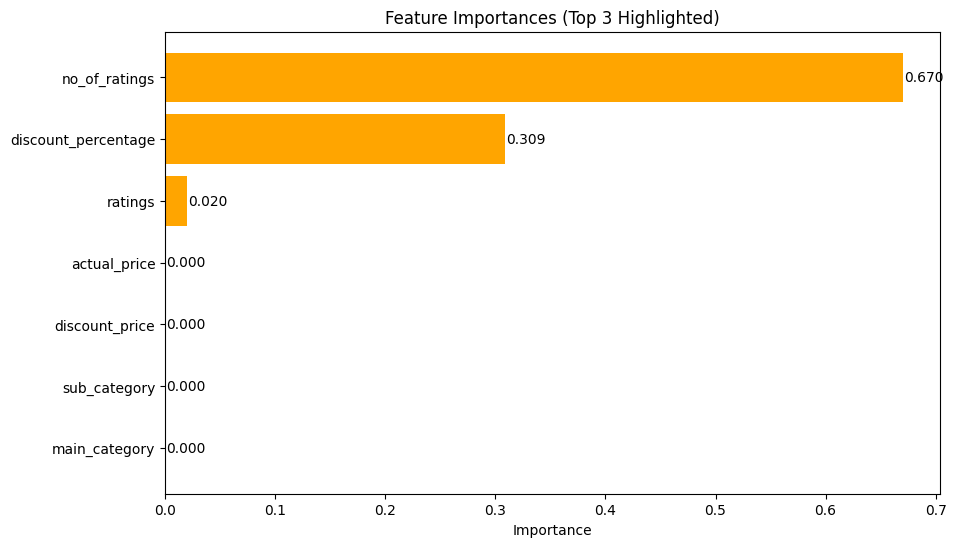

In [ ]:
import matplotlib.pyplot as plt

# Sort features ascending for horizontal bar chart
all_features = fi_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))

# Define colors: top 3 important features in orange, rest in lightgreen
colors = ['orange' if i in all_features.tail(3).index else 'lightgreen' for i in all_features.index]

bars = plt.barh(all_features['Feature'], all_features['Importance'], color=colors)
plt.xlabel('Importance')
plt.title('Feature Importances (Top 3 Highlighted)')

# Add importance values at the end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', va='center')

plt.show()


In [ ]:
# Fill missing numeric values with median (safer for skewed distributions)
for col in ['ratings', 'no_of_ratings', 'discount_price', 'actual_price', 'discount_percentage']:
    df[col] = df[col].fillna(df[col].median())


In [ ]:
df['rating_per_review'] = df['ratings'] / (df['no_of_ratings'] + 1)  # +1 to avoid division by zero


In [ ]:
df['discount_percentage'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100


In [ ]:
import numpy as np

df['log_no_of_ratings'] = np.log1p(df['no_of_ratings'])
df['log_ratings'] = np.log1p(df['ratings'])


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['discount_percentage', 'log_no_of_ratings', 'log_ratings', 'actual_price', 'discount_price', 'rating_per_review']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [ ]:
from sklearn.model_selection import train_test_split

# Features
features = ['log_no_of_ratings', 'log_ratings', 'discount_percentage', 'rating_per_review', 'actual_price', 'discount_price']

X = df[features].values
y = df['profitability_score'].values  # assuming this is your target


In [ ]:
# Sample for speed if dataset is very large
sample_size = 200_000
X_sample, y_sample = X[:sample_size], y[:sample_size]

X_train, X_temp, y_train, y_temp = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Shapes -> train:", X_train.shape, "val:", X_val.shape, "test:", X_test.shape)


Shapes -> train: (140000, 6) val: (30000, 6) test: (30000, 6)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=15, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [ ]:
import numpy as np

def evaluate(model, X, y, label="Set"):
    preds = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, preds))
    r2 = r2_score(y, preds)
    print(f"{label} -> RMSE: {rmse:.4f}, R²: {r2:.4f}")
    return rmse, r2

train_metrics = evaluate(rf, X_train, y_train, "Train")
val_metrics   = evaluate(rf, X_val, y_val, "Validation")
test_metrics  = evaluate(rf, X_test, y_test, "Test")


Train -> RMSE: 0.0969, R²: 0.9999
Validation -> RMSE: 0.1740, R²: 0.9998
Test -> RMSE: 0.2127, R²: 0.9997


               Feature  Importance
0    log_no_of_ratings    0.625290
2  discount_percentage    0.352897
1          log_ratings    0.020806
3    rating_per_review    0.000789
4         actual_price    0.000128
5       discount_price    0.000089


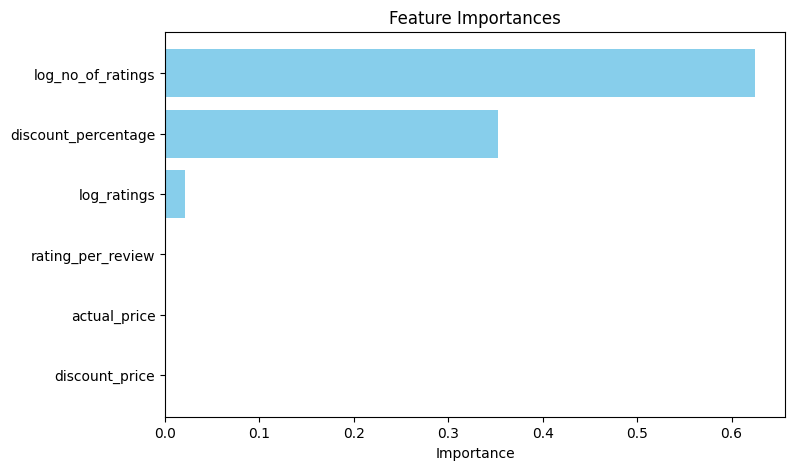

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_names = ['log_no_of_ratings', 'log_ratings', 'discount_percentage', 'rating_per_review', 'actual_price', 'discount_price']

fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(fi_df)

# Plot top 5 features
plt.figure(figsize=(8,5))
plt.barh(fi_df['Feature'], fi_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
sample = df.sample(n=200000, random_state=42)
X = sample[features]
y = sample['profitability_score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [ ]:
df_test_index = X_test.index


In [ ]:
# Suppose y_pred = rf.predict(X_test)
df.loc[df_test_index, 'Predicted_Profitability'] = y_pred


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# -----------------------------
# Step 0: Prepare train/test split
# -----------------------------
sample = df.sample(n=200000, random_state=42)  # sample for speed
features = ['log_no_of_ratings', 'log_ratings', 'discount_percentage',
            'rating_per_review', 'actual_price', 'discount_price']
X = sample[features]
y = sample['profitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
df_test_index = X_test.index  # Save indices for later

# -----------------------------
# Step 1: Train RandomForest
# -----------------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# -----------------------------
# Step 2: Attach predictions to original df
# -----------------------------
df.loc[df_test_index, 'Predicted_Profitability'] = y_pred

# -----------------------------
# Step 3: Make category monthly series for forecasting
# -----------------------------
from datetime import datetime
from dateutil.relativedelta import relativedelta

def make_category_monthly_series(df, category, months=24, seed=42, trend_strength=0.02, seasonality_strength=0.15):
    rng = np.random.RandomState(seed)
    cat_df = df[df['main_category'] == category].copy()
    if cat_df.shape[0] == 0:
        raise ValueError("No products found for category: " + str(category))

    # timeline: month starts (oldest -> newest)
    end = pd.Timestamp.today().replace(day=1)
    months_list = [end - relativedelta(months=(months-1 - i)) for i in range(months)]
    months_idx = np.arange(months)
    monthly_totals = np.zeros(months, dtype=float)

    for _, row in cat_df.iterrows():
        total = row.get('Predicted_Profitability', 0)
        if total <= 0:
            base = rng.poisson(0.2, size=months)
            monthly_totals += base
            continue
        alpha = np.ones(months) * 0.5
        weights = rng.dirichlet(alpha)
        trend_multiplier = 1 + trend_strength * months_idx
        weights = weights * trend_multiplier
        weights = weights / weights.sum()
        prod_month = weights * total
        monthly_totals += prod_month

    # seasonality
    season = 1 + seasonality_strength * np.sin(2 * np.pi * (months_idx % 12) / 12.0 + rng.uniform(0, 2*np.pi))
    monthly_totals = monthly_totals * season
    noise = rng.normal(loc=0.0, scale=np.maximum(1.0, monthly_totals * 0.05), size=months)
    monthly_totals = np.maximum(0, monthly_totals + noise)

    df_ts = pd.DataFrame({
        'ds': months_list,
        'y': monthly_totals
    })
    df_ts['y'] = df_ts['y'].round(2)

    # normalize month start (midnight) to avoid Prophet KeyError
    df_ts['ds'] = pd.to_datetime(df_ts['ds']).dt.to_period('M').dt.to_timestamp()
    return df_ts

# -----------------------------
# Step 4: Example usage
# -----------------------------
category = "home & kitchen"
df_cat_ts = make_category_monthly_series(df, category, months=24)
print(df_cat_ts.head())


          ds   y
0 2023-10-01 NaN
1 2023-11-01 NaN
2 2023-12-01 NaN
3 2024-01-01 NaN
4 2024-02-01 NaN


In [ ]:
def make_category_monthly_series(df, category, months=24, seed=42, trend_strength=0.02, seasonality_strength=0.15):
    rng = np.random.RandomState(seed)
    cat_df = df[df['main_category'] == category].copy()
    if cat_df.shape[0] == 0:
        raise ValueError("No products found for category: " + str(category))

    # Fill missing predicted profitability with 0
    cat_df['Predicted_Profitability'] = cat_df['Predicted_Profitability'].fillna(0)

    # timeline: month starts (oldest -> newest)
    end = pd.Timestamp.today().replace(day=1)
    months_list = [end - relativedelta(months=(months-1 - i)) for i in range(months)]
    months_idx = np.arange(months)
    monthly_totals = np.zeros(months, dtype=float)

    for _, row in cat_df.iterrows():
        total = row['Predicted_Profitability']
        if total <= 0:
            base = rng.poisson(0.2, size=months)
            monthly_totals += base
            continue
        alpha = np.ones(months) * 0.5
        weights = rng.dirichlet(alpha)
        trend_multiplier = 1 + trend_strength * months_idx
        weights = weights * trend_multiplier
        weights = weights / weights.sum()
        prod_month = weights * total
        monthly_totals += prod_month

    # seasonality
    season = 1 + seasonality_strength * np.sin(2 * np.pi * (months_idx % 12) / 12.0 + rng.uniform(0, 2*np.pi))
    monthly_totals = monthly_totals * season
    noise = rng.normal(loc=0.0, scale=np.maximum(1.0, monthly_totals * 0.05), size=months)
    monthly_totals = np.maximum(0, monthly_totals + noise)

    df_ts = pd.DataFrame({
        'ds': months_list,
        'y': monthly_totals
    })
    df_ts['y'] = df_ts['y'].round(2)
    df_ts['ds'] = pd.to_datetime(df_ts['ds']).dt.to_period('M').dt.to_timestamp()

    return df_ts

# Example usage
category = "home & kitchen"
df_cat_ts = make_category_monthly_series(df, category, months=24)
print(df_cat_ts.head())


          ds        y
0 2023-10-01  6716.26
1 2023-11-01  6446.60
2 2023-12-01  6340.19
3 2024-01-01  5767.01
4 2024-02-01  4945.14


In [ ]:
from prophet import Prophet

# Step 5C.1 — Fit Prophet model
m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
m.fit(df_cat_ts)

# Step 5C.2 — Make future dataframe for next 6 months
future = m.make_future_dataframe(periods=6, freq='MS')  # MS = month start

# Step 5C.3 — Forecast
forecast = m.predict(future)

# Preview forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/iheh0nr5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/rl4xlfjq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90729', 'data', 'file=/tmp/tmpzqr3yyih/iheh0nr5.json', 'init=/tmp/tmpzqr3yyih/rl4xlfjq.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modeli7lurexj/prophet_model-20250924110615.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:06:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:06:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
20,2025-06-01,5328.725586,5328.725586,5328.725586
21,2025-07-01,6109.124809,6109.124809,6109.124809
22,2025-08-01,6967.063612,6967.063612,6967.063612
23,2025-09-01,6478.761016,6478.761016,6478.761016
24,2025-10-01,6709.881297,6697.043665,6722.351469
25,2025-11-01,6867.757479,6825.501719,6909.418918
26,2025-12-01,6223.102834,6139.334739,6303.382611
27,2026-01-01,5797.348844,5661.481095,5923.726439
28,2026-02-01,5601.227543,5410.907628,5789.316079
29,2026-03-01,5195.333193,4941.525670,5442.706017


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 5C.4 — Evaluate forecast
# Use the last 6 months of actual data
actual_df = df_cat_ts.tail(6)
predicted = forecast.set_index('ds').loc[actual_df['ds'], 'yhat'].values

mae = mean_absolute_error(actual_df['y'], predicted)
rmse = np.sqrt(mean_squared_error(actual_df['y'], predicted))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


MAE: 0.01, RMSE: 0.01


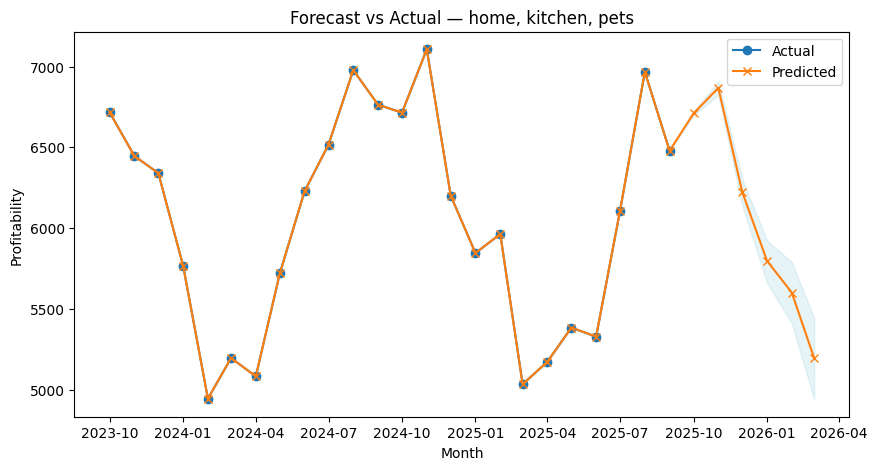

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_cat_ts['ds'], df_cat_ts['y'], label='Actual', marker='o')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', marker='x')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightblue', alpha=0.3)
plt.title(f"Forecast vs Actual — {cat}")
plt.xlabel('Month')
plt.ylabel('Profitability')
plt.legend()
plt.show()


INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/pvcck3gb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/xqos_41y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81524', 'data', 'file=/tmp/tmpzqr3yyih/pvcck3gb.json', 'init=/tmp/tmpzqr3yyih/xqos_41y.json', 'output', 'file=/tmp/tmpzqr3yyih/prophet_modelt2n9w0ua/prophet_model-20250924110638.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:06:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:06:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqr3yyih/wcdqbwg8.json
DEBUG:cmdstanpy:input tempfi

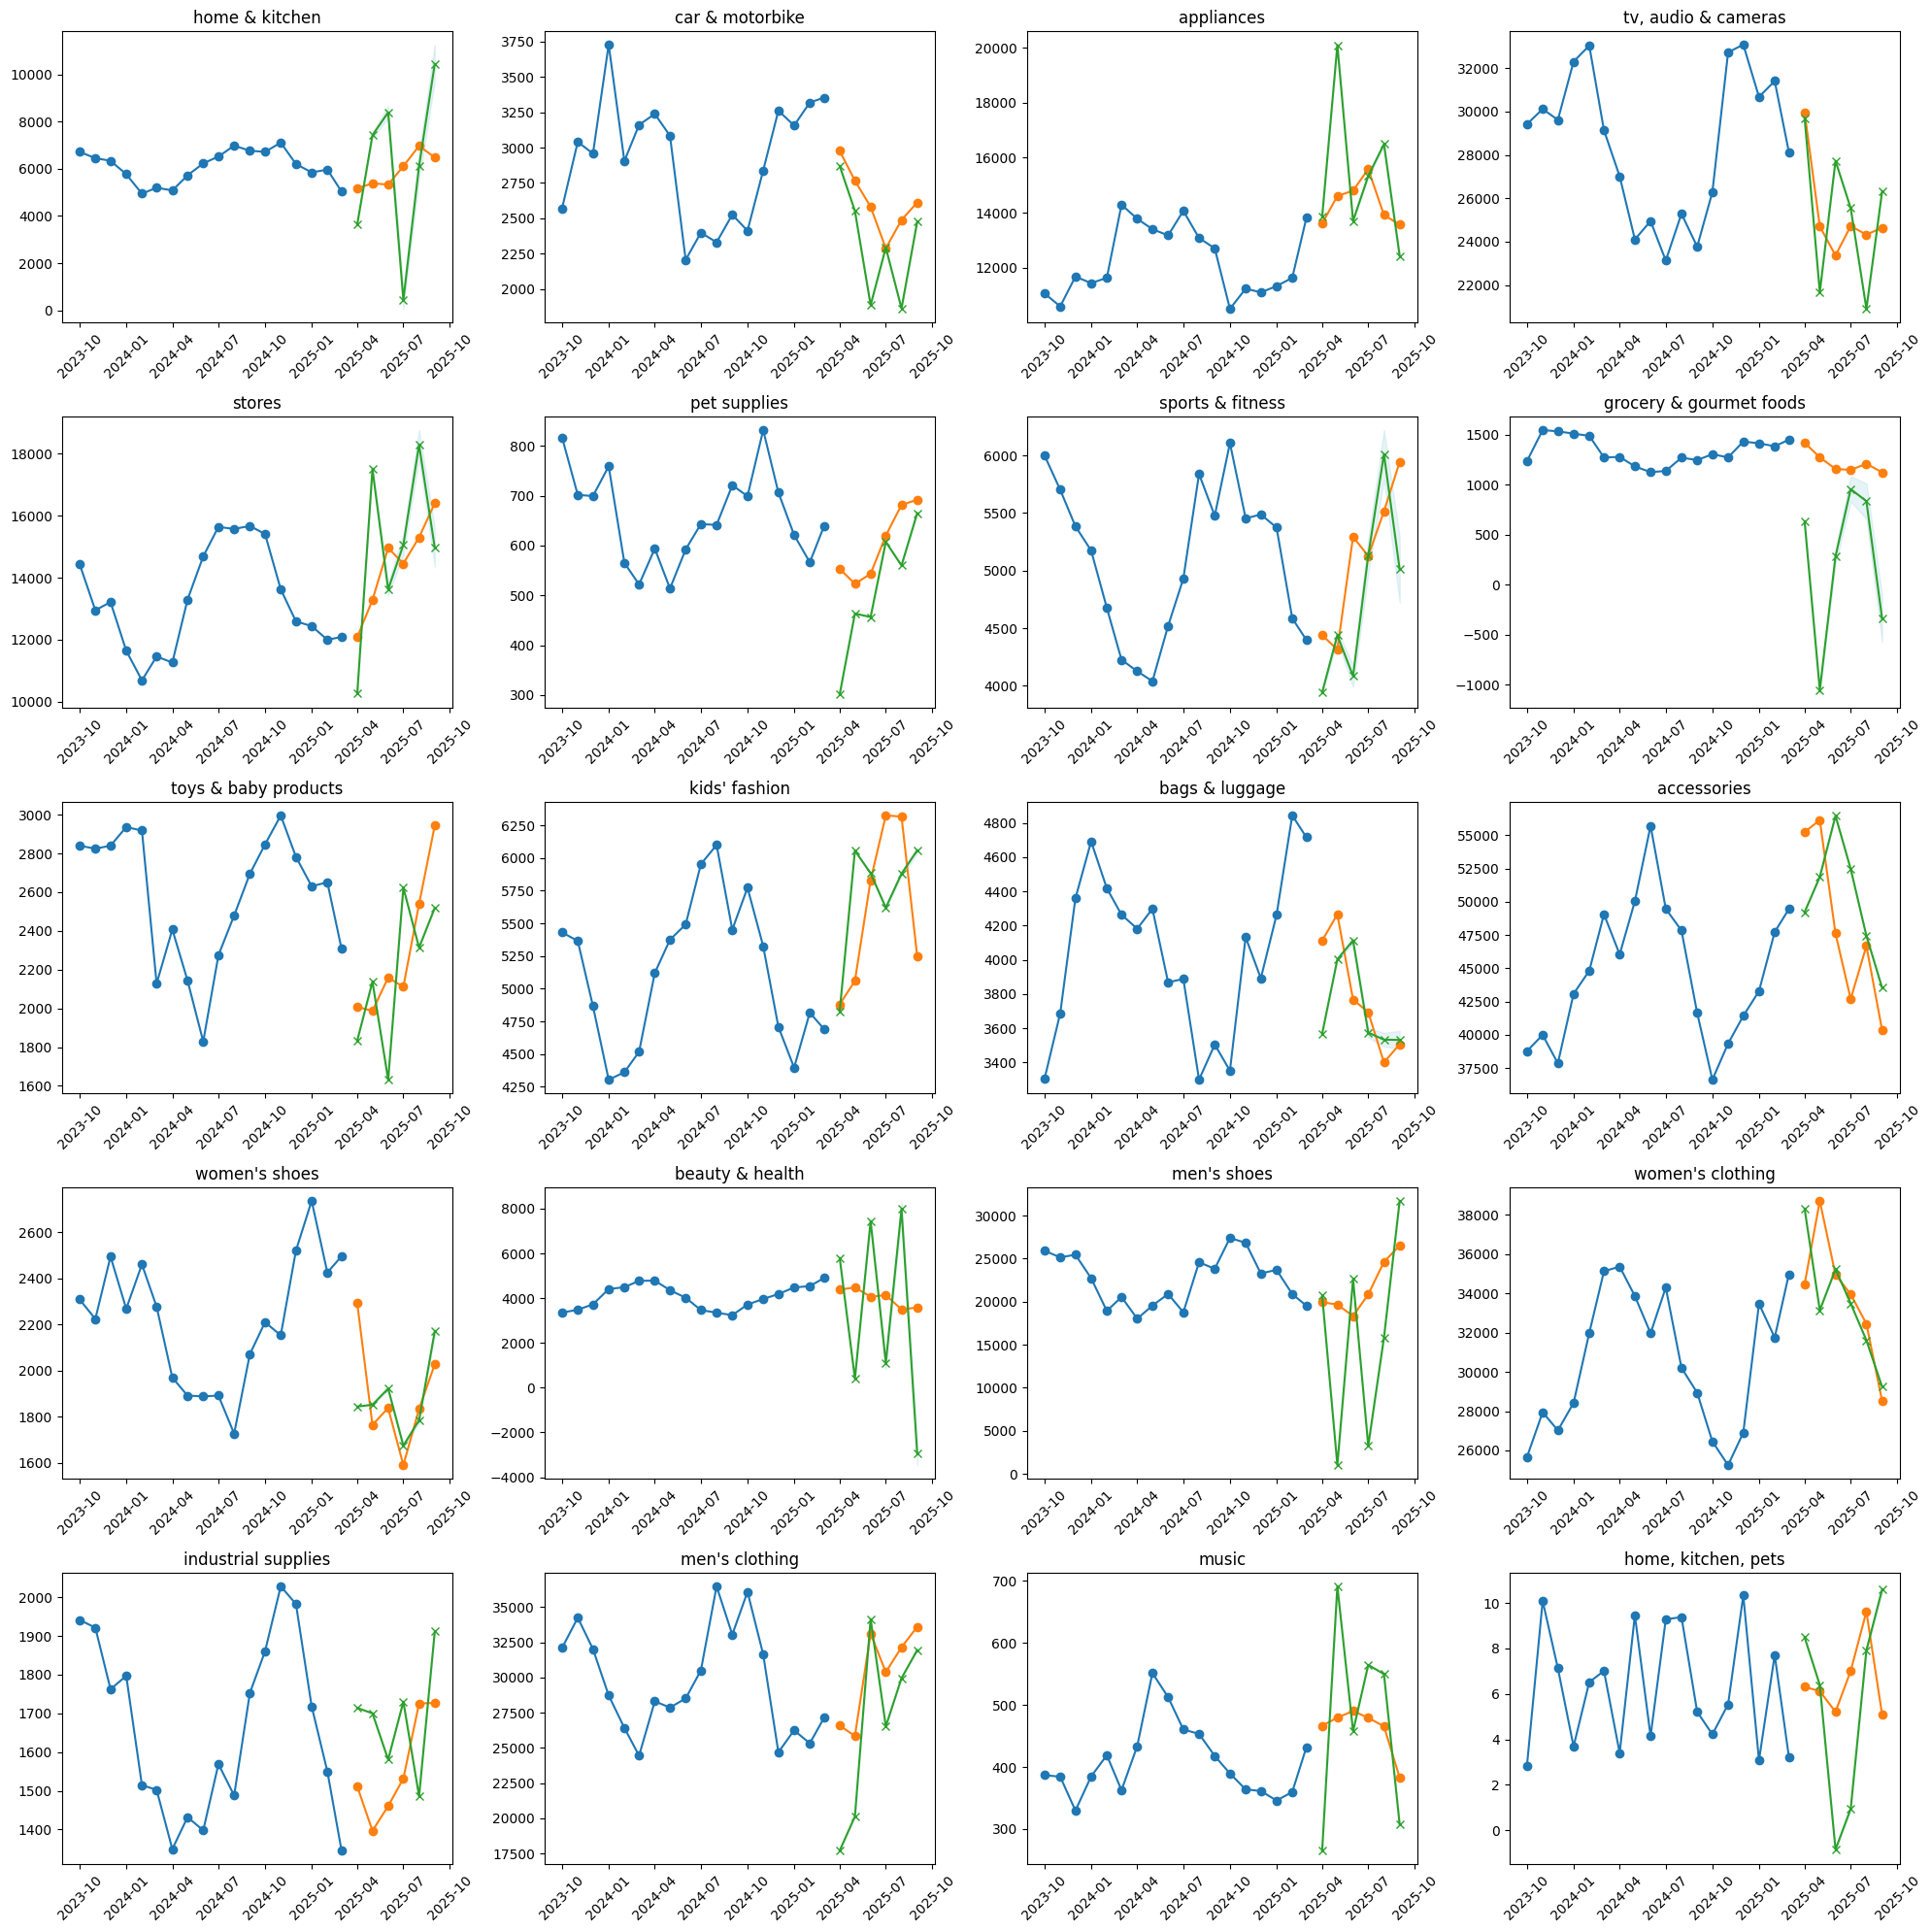

                   Category          MAE          RMSE   MAPE (%)
19      home, kitchen, pets     3.629789      4.309941  61.260027
5              pet supplies    93.119436    122.507343  16.087989
18                    music   115.032994    133.099667  24.913210
12            women's shoes   149.121893    201.966491   7.341181
16      industrial supplies   208.174405    215.445464  13.483798
10           bags & luggage   238.037274    293.252770   6.062642
1           car & motorbike   297.117701    398.011827  11.470544
8      toys & baby products   335.811898    370.694116  14.710008
9             kids' fashion   509.211846    625.243143   9.198506
6          sports & fitness   544.510620    688.547725  10.293757
7   grocery & gourmet foods  1002.874847   1232.322900  81.931635
2                appliances  1801.946117   2564.119024  12.569857
15         women's clothing  1956.110973   2812.177242   5.479379
4                    stores  2064.640178   2387.191506  14.684900
3       tv

In [ ]:
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

categories = [
    'home & kitchen', 'car & motorbike', 'appliances', 'tv, audio & cameras',
    'stores', 'pet supplies', 'sports & fitness', 'grocery & gourmet foods',
    'toys & baby products', "kids' fashion", 'bags & luggage', 'accessories',
    "women's shoes", 'beauty & health', "men's shoes", "women's clothing",
    'industrial supplies', "men's clothing", 'music', 'home, kitchen, pets'
]

summary = []

# Prepare subplot grid (5 rows x 4 columns = 20 plots)
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()

for i, cat in enumerate(categories):
    # 1️⃣ Make monthly time series
    df_cat_ts = make_category_monthly_series(df, cat, months=24)

    # 2️⃣ Split last 6 months as test
    train_df = df_cat_ts.iloc[:-6].copy()
    test_df  = df_cat_ts.iloc[-6:].copy()

    # Normalize ds
    train_df['ds'] = pd.to_datetime(train_df['ds']).dt.to_period('M').dt.to_timestamp()
    test_df['ds']  = pd.to_datetime(test_df['ds']).dt.to_period('M').dt.to_timestamp()

    # 3️⃣ Train Prophet
    model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
    model.fit(train_df)

    # 4️⃣ Forecast test period
    future = test_df[['ds']].copy()
    forecast = model.predict(future)
    forecast['ds'] = pd.to_datetime(forecast['ds']).dt.to_period('M').dt.to_timestamp()

    # 5️⃣ Evaluate
    y_true = test_df['y'].values
    y_pred = forecast['yhat'].values
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-9))) * 100

    summary.append([cat, mae, rmse, mape])

    # 6️⃣ Plot on the grid
    ax = axes[i]
    ax.plot(train_df['ds'], train_df['y'], label='Train', marker='o')
    ax.plot(test_df['ds'], test_df['y'], label='Actual', marker='o')
    ax.plot(forecast['ds'], forecast['yhat'], label='Predicted', marker='x')
    ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightblue', alpha=0.3)
    ax.set_title(cat)
    ax.tick_params(axis='x', rotation=45)

# Remove empty subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 7️⃣ Summary DataFrame
summary_df = pd.DataFrame(summary, columns=['Category', 'MAE', 'RMSE', 'MAPE (%)']).sort_values('MAE')
print(summary_df)


In [ ]:
import numpy as np
import pandas as pd

# Avoid log(0) by adding 1
df['log_no_of_ratings'] = np.log1p(df['no_of_ratings'])
df['log_ratings'] = np.log1p(df['ratings'])
df['log_actual_price'] = np.log1p(df['actual_price'])
df['log_discount_price'] = np.log1p(df['discount_price'])

# Quick check
df[['no_of_ratings','log_no_of_ratings','ratings','log_ratings','actual_price','log_actual_price']].head()


,no_of_ratings,log_no_of_ratings,ratings,log_ratings,actual_price,log_actual_price
0,16946,9.737846,4.1,1.629241,-0.001664,-0.001665
1,26857,10.198319,4.3,1.667707,-0.001670,-0.001672
2,13919,9.541082,4.2,1.648659,-0.001681,-0.001682
3,3306,8.103797,3.7,1.547563,-0.001558,-0.001559
4,19981,9.902587,4.6,1.722767,-0.001679,-0.001680


In [ ]:
# Ratings per review
df['rating_per_review'] = df['ratings'] / (df['no_of_ratings'] + 1)

# Discount fraction
df['discount_fraction'] = df['discount_percentage'] / 100

# Check new columns
df[['rating_per_review', 'discount_fraction']].head()


,rating_per_review,discount_fraction
0,0.000242,-0.011069
1,0.000160,-0.007323
2,0.000302,-0.001899
3,0.001119,0.014179
4,0.000230,-0.015985


In [ ]:
# Cap negative discount_fraction to 0
df['discount_fraction'] = df['discount_fraction'].clip(lower=0)

# Optionally, cap extremely high rating_per_review to avoid outliers
df['rating_per_review'] = df['rating_per_review'].clip(upper=df['rating_per_review'].quantile(0.99))

# Quick check
df[['rating_per_review', 'discount_fraction']].describe()


,rating_per_review,discount_fraction
count,1.067544e+06,1.067538e+06
mean,3.243909e-01,4.155293e-03
std,5.956153e-01,5.064311e-03
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,3.250000e-02,1.938633e-03
75%,3.636364e-01,7.877193e-03
max,2.500000e+00,2.231543e-02


In [ ]:
# Manual Target Encoding
cat_features = ['main_category', 'sub_category']
y = df['profitability_score']  # your target column

for col in cat_features:
    # compute mean profitability per category
    mapping = df.groupby(col)['profitability_score'].mean()
    # replace category with mean
    df[col + '_enc'] = df[col].map(mapping)

# drop original categorical columns if you want
df = df.drop(columns=cat_features)

# check new encoded columns
df.head()


,name,image,link,ratings,no_of_ratings,discount_price,actual_price,source_file,discount_percentage,profitability_score,rating_per_review,log_no_of_ratings,log_ratings,Predicted_Profitability,log_actual_price,log_discount_price,discount_fraction,main_category_enc,sub_category_enc
0,Godrej aer Matic Kit (Machine + 1 Refill) - Au...,https://m.media-amazon.com/images/I/6121tV2hW9...,https://www.amazon.in/Godrej-Matic-Spray-Viole...,4.1,16946,-0.251598,-0.001664,All Home and Kitchen.csv,-1.106874,12.98,0.000242,9.737846,1.629241,13.4994,-0.001665,-0.289815,0.000000,12.168972,19.105049
1,"Presto! Oxo-Biodegradable Garbage Bags, Large ...",https://m.media-amazon.com/images/I/71-2fEBGZD...,https://www.amazon.in/Amazon-Brand-Presto-Oxo-...,4.3,26857,-0.263829,-0.001670,All Home and Kitchen.csv,-0.732324,21.50,0.000160,10.198319,1.667707,NaN,-0.001672,-0.306293,0.000000,12.168972,19.105049
2,Happilo 100% Natural Premium 200g Whole Cashew...,https://m.media-amazon.com/images/I/71tYPz++3+...,https://www.amazon.in/Happilo-100-Natural-Prem...,4.2,13919,-0.279510,-0.001681,All Home and Kitchen.csv,-0.189948,29.22,0.000302,9.541082,1.648659,NaN,-0.001682,-0.327823,0.000000,12.168972,19.105049
3,beatXP Kitchen Scale Multipurpose Portable Ele...,https://m.media-amazon.com/images/I/61Is7sICRJ...,https://www.amazon.in/beatXP-Multipurpose-Port...,3.7,3306,-0.258602,-0.001558,All Home and Kitchen.csv,1.417899,43.11,0.001119,8.103797,1.547563,NaN,-0.001559,-0.299217,0.014179,12.168972,19.105049
4,"Dettol Antiseptic Liquid for First Aid , Surfa...",https://m.media-amazon.com/images/I/51fFgtFBsh...,https://www.amazon.in/Dettol-Antiseptic-Liquid...,4.6,19981,-0.264561,-0.001679,All Home and Kitchen.csv,-1.598461,4.95,0.000230,9.902587,1.722767,NaN,-0.001680,-0.307287,0.000000,12.168972,19.105049


In [ ]:
feature_cols = [
    'rating_per_review', 'discount_fraction',
    'log_no_of_ratings', 'log_ratings',
    'log_actual_price', 'log_discount_price',
    'discount_percentage',
    'main_category_enc', 'sub_category_enc'
]

X = df[feature_cols].values
y = df['profitability_score'].values


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shapes -> train:", X_train.shape, "test:", X_test.shape)


Shapes -> train: (854035, 9) test: (213509, 9)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the model
rf = RandomForestRegressor(
    n_estimators=200,   # number of trees
    max_depth=15,       # limit depth to prevent overfitting
    random_state=42,
    n_jobs=-1           # use all CPU cores
)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_train = rf.predict(X_train)
y_pred_test  = rf.predict(X_test)

# Metrics
def print_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset_name} -> MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    return mae, rmse, r2

train_metrics = print_metrics(y_train, y_pred_train, "Train")
test_metrics  = print_metrics(y_test, y_pred_test, "Test")


Train -> MAE: 0.0365, RMSE: 0.0766, R²: 0.9999
Test -> MAE: 0.0422, RMSE: 0.0956, R²: 0.9999


In [ ]:
importances = rf.feature_importances_

# Provide the feature names in the same order as X_train columns
feature_names = [
    'log_no_of_ratings', 'log_ratings', 'discount_percentage',
    'rating_per_review', 'actual_price', 'discount_price',
    'rating_per_review', 'discount_fraction', 'main_category_enc'
]

fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(fi_df)


               Feature  Importance
2  discount_percentage    0.671129
6    rating_per_review    0.282944
1          log_ratings    0.025326
3    rating_per_review    0.020058
0    log_no_of_ratings    0.000458
4         actual_price    0.000039
5       discount_price    0.000025
7    discount_fraction    0.000012
8    main_category_enc    0.000009


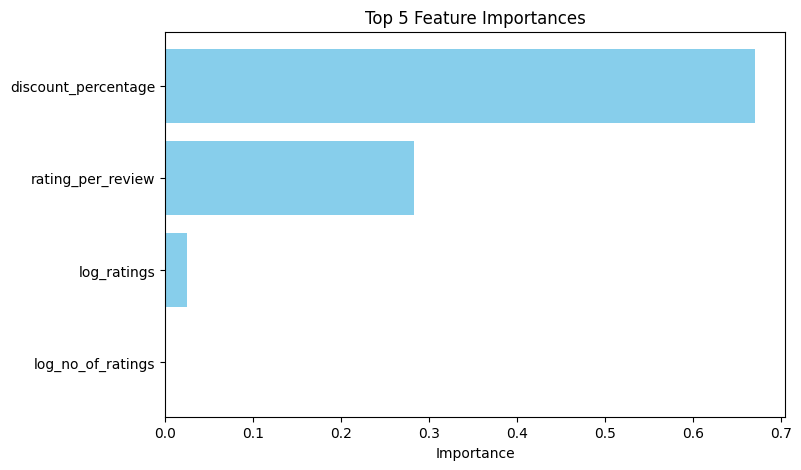

In [ ]:
import matplotlib.pyplot as plt

# Select top 5 features
top_features = fi_df.head(5)

plt.figure(figsize=(8, 5))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 5 Feature Importances')
plt.gca().invert_yaxis()  # Largest importance on top
plt.show()


In [ ]:
# Keep features with importance > 0.01 (adjust threshold if needed)
important_features = fi_df[fi_df['Importance'] > 0.01]['Feature'].tolist()
print("Selected features:", important_features)

# Create new X using only important features
X_train_new = X_train[:, [list(feature_names).index(f) for f in important_features]]
X_val_new   = X_val[:, [list(feature_names).index(f) for f in important_features]]
X_test_new  = X_test[:, [list(feature_names).index(f) for f in important_features]]


Selected features: ['discount_percentage', 'rating_per_review', 'log_ratings', 'rating_per_review']
